# Data

This chapter provides examples for cleaning and preparing data for data
mining.

**Packages used for this chapter:** `r format_pkgs(pkgs)`

## The Iris Dataset

In [8]:
options(digits = 3)

We will use a toy dataset that comes with R. [Fisher's iris
dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) gives the
measurements in centimeters of the variables sepal length, sepal width
petal length, and petal width for 150 flowers. The dataset contains 50
flowers from each of 3 species of iris. The species are Iris Setosa,
Iris Versicolor, and Iris Virginica. For more details see `? iris`.

We load the iris data set. Datasets that come with R or R packages can
be loaded with `data()`. The standard format for data in R is a
data.frame. We convert the data.frame into a tidyverse tibble.

In [9]:
str(data())

List of 4
 $ title  : chr "Data sets"
 $ header : NULL
 $ results: chr [1:150, 1:4] "GGally" "GGally" "GGally" "GGally" ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "Package" "LibPath" "Item" "Title"
 $ footer : chr "Use ‘data(package = .packages(all.available = TRUE))’\nto list the data sets in all *available* packages."
 - attr(*, "class")= chr "packageIQR"


In [10]:
library(tidyverse)
data(iris)
iris <- as_tibble(iris)
iris

Sepal.Length Sepal.Width Petal.Length Petal.Width Species  
1   5.1          3.5         1.4          0.2         setosa   
2   4.9          3.0         1.4          0.2         setosa   
3   4.7          3.2         1.3          0.2         setosa   
4   4.6          3.1         1.5          0.2         setosa   
5   5.0          3.6         1.4          0.2         setosa   
6   5.4          3.9         1.7          0.4         setosa   
7   4.6          3.4         1.4          0.3         setosa   
8   5.0          3.4         1.5          0.2         setosa   
9   4.4          2.9         1.4          0.2         setosa   
10  4.9          3.1         1.5          0.1         setosa   
11  5.4          3.7         1.5          0.2         setosa   
12  4.8          3.4         1.6          0.2         setosa   
13  4.8          3.0         1.4          0.1         setosa   
14  4.3          3.0         1.1          0.1         setosa   
15  5.8          4.0         1.2          0.2         setosa   
16  5.7          4.4         1.5          0.4         setosa   
17  5.4          3.9         1.3          0.4         setosa   
18  5.1          3.5         1.4          0.3         setosa   
19  5.7          3.8         1.7          0.3         setosa   
20  5.1          3.8         1.5          0.3         setosa   
21  5.4          3.4         1.7          0.2         setosa   
22  5.1          3.7         1.5          0.4         setosa   
23  4.6          3.6         1.0          0.2         setosa   
24  5.1          3.3         1.7          0.5         setosa   
25  4.8          3.4         1.9          0.2         setosa   
26  5.0          3.0         1.6          0.2         setosa   
27  5.0          3.4         1.6          0.4         setosa   
28  5.2          3.5         1.5          0.2         setosa   
29  5.2          3.4         1.4          0.2         setosa   
30  4.7          3.2         1.6          0.2         setosa   
⋮   ⋮            ⋮           ⋮            ⋮           ⋮        
121 6.9          3.2         5.7          2.3         virginica
122 5.6          2.8         4.9          2.0         virginica
123 7.7          2.8         6.7          2.0         virginica
124 6.3          2.7         4.9          1.8         virginica
125 6.7          3.3         5.7          2.1         virginica
126 7.2          3.2         6.0          1.8         virginica
127 6.2          2.8         4.8          1.8         virginica
128 6.1          3.0         4.9          1.8         virginica
129 6.4          2.8         5.6          2.1         virginica
130 7.2          3.0         5.8          1.6         virginica
131 7.4          2.8         6.1          1.9         virginica
132 7.9          3.8         6.4          2.0         virginica
133 6.4          2.8         5.6          2.2         virginica
134 6.3          2.8         5.1          1.5         virginica
135 6.1          2.6         5.6          1.4         virginica
136 7.7          3.0         6.1          2.3         virginica
137 6.3          3.4         5.6          2.4         virginica
138 6.4          3.1         5.5          1.8         virginica
139 6.0          3.0         4.8          1.8         virginica
140 6.9          3.1         5.4          2.1         virginica
141 6.7          3.1         5.6          2.4         virginica
142 6.9          3.1         5.1          2.3         virginica
143 5.8          2.7         5.1          1.9         virginica
144 6.8          3.2         5.9          2.3         virginica
145 6.7          3.3         5.7          2.5         virginica
146 6.7          3.0         5.2          2.3         virginica
147 6.3          2.5         5.0          1.9         virginica
148 6.5          3.0         5.2          2.0         virginica
149 6.2          3.4         5.4          2.3         virginica
150 5.9          3.0         5.1          1.8         virginica

We see that the data contains 150 rows (flowers) and 5 features. tibbles
only show the first few rows and do not show all features, if they do
not fit the screen width. We can call `print` and define how many rows
to show using parameter `n` and force print to show all features by
changing the `width` to infinity.

In [11]:
print(iris, n = 3, width = Inf)

# A tibble: 150 × 5
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
         <dbl>       <dbl>        <dbl>       <dbl> <fct>  
1          5.1         3.5          1.4         0.2 setosa 
2          4.9         3            1.4         0.2 setosa 
3          4.7         3.2          1.3         0.2 setosa 
# … with 147 more rows


## Data Quality

Assessing the quality of the available data is crucial before we start
using the data. Start with summary statistics for each column to
identify outliers and missing values.

In [12]:
summary(iris)

  Sepal.Length   Sepal.Width    Petal.Length   Petal.Width        Species  
 Min.   :4.30   Min.   :2.00   Min.   :1.00   Min.   :0.1   setosa    :50  
 1st Qu.:5.10   1st Qu.:2.80   1st Qu.:1.60   1st Qu.:0.3   versicolor:50  
 Median :5.80   Median :3.00   Median :4.35   Median :1.3   virginica :50  
 Mean   :5.84   Mean   :3.06   Mean   :3.76   Mean   :1.2                  
 3rd Qu.:6.40   3rd Qu.:3.30   3rd Qu.:5.10   3rd Qu.:1.8                  
 Max.   :7.90   Max.   :4.40   Max.   :6.90   Max.   :2.5                  

In [13]:
glimpse(iris)

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


You can also summarize specific columns using a statistic function like
`mean()`.

In [14]:
iris %>% summarize_if(is.numeric, mean)

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 5.84         3.06        3.76         1.2

To find outliers or data problems, you need to look for very small
values (often a suspicious large number of zeros) using min and for
extremely large values using max. Comparing median and mean tells us if
the distribution is symmetric.

A visual method to inspect the data is to use a scatterplot matrix (we
use here `ggpairs()` from package `GGally`). In this plot, we can
visually identify noise data points and outliers (points that are far
from the majority of other points).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


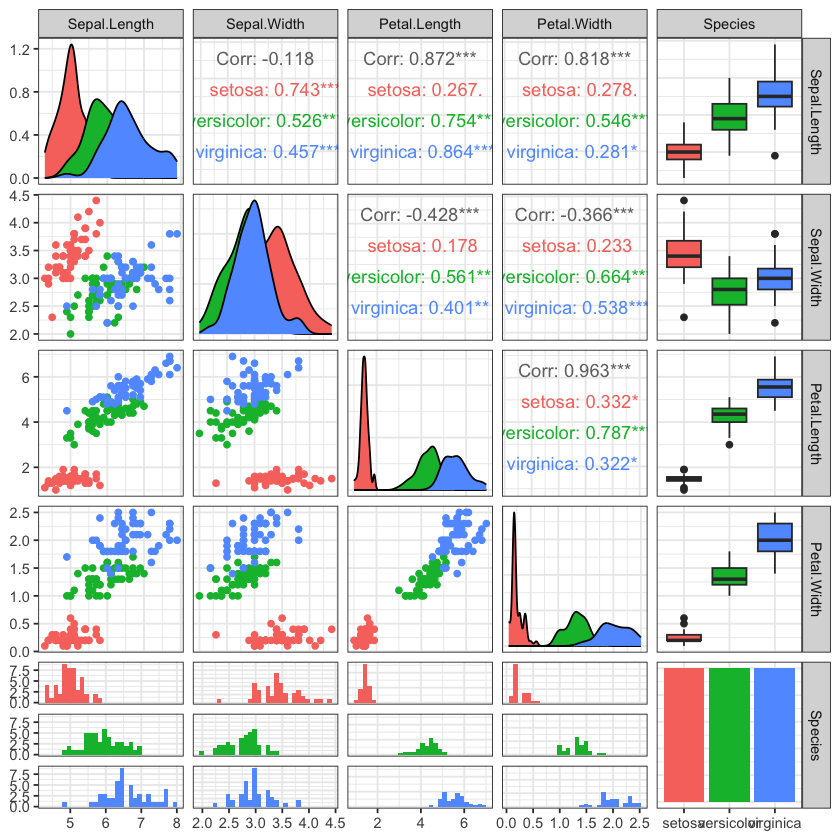

In [15]:
library(GGally)
ggpairs(iris, aes(color = Species)) + theme_bw()

See if you can spot the one red dot that is far away from all others.

Many data mining methods require complete data, that is the data cannot
contain missing values (`NA`). To remove missing values and duplicates
(identical data points which might be a mistake in the data), we often
do this:

In [16]:
clean.data <- iris %>% drop_na() %>% unique()
summary(clean.data)

  Sepal.Length   Sepal.Width    Petal.Length   Petal.Width        Species  
 Min.   :4.30   Min.   :2.00   Min.   :1.00   Min.   :0.1   setosa    :50  
 1st Qu.:5.10   1st Qu.:2.80   1st Qu.:1.60   1st Qu.:0.3   versicolor:50  
 Median :5.80   Median :3.00   Median :4.30   Median :1.3   virginica :49  
 Mean   :5.84   Mean   :3.06   Mean   :3.75   Mean   :1.2                  
 3rd Qu.:6.40   3rd Qu.:3.30   3rd Qu.:5.10   3rd Qu.:1.8                  
 Max.   :7.90   Max.   :4.40   Max.   :6.90   Max.   :2.5                  

Note that one non-unique case is gone leaving only 149 flowers. The data
did not contain missing values, but if it did, they would also have been
dropped. Typically, you should spend a lot more time on data cleaning.

## Aggregation

Data often contains groups and we want to compare these groups. We group
the iris dataset by species and then calculate a summary statistic for
each group.

In [17]:
iris %>% group_by(Species) %>% summarize_all(mean)
iris %>% group_by(Species) %>% summarize_all(median)

Species    Sepal.Length Sepal.Width Petal.Length Petal.Width
1 setosa     5.01         3.43        1.46         0.246      
2 versicolor 5.94         2.77        4.26         1.326      
3 virginica  6.59         2.97        5.55         2.026

Species    Sepal.Length Sepal.Width Petal.Length Petal.Width
1 setosa     5.0          3.4         1.50         0.2        
2 versicolor 5.9          2.8         4.35         1.3        
3 virginica  6.5          3.0         5.55         2.0

Using this information, we can compare how features differ between
groups.

## Sampling

[Sampling](https://en.wikipedia.org/wiki/Sampling_(statistics)) is often
used in data mining to reduce the dataset size before modeling or
visualization.

### Random Sampling

The built-in sample function can sample from a vector. Here we sample
with replacement.

In [18]:
sample(c("A", "B", "C"), size = 10, replace = TRUE)

[1] "C" "C" "A" "B" "A" "C" "B" "A" "B" "C"

We often want to sample rows from a dataset. This can be done by
sampling without replacement from a vector with row indices (using the
functions `seq()` and `nrow()`). The sample vector is then used to
subset the rows of the dataset.

In [19]:
take <- sample(seq(nrow(iris)), size = 15)
take

[1]  89 136  77  75  25  74   1 128  35 150  53 139  31  10 120

In [20]:
sample_n(clean.data, 15)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
1  6.0          3.0         4.8          1.8         virginica 
2  6.9          3.1         4.9          1.5         versicolor
3  5.1          3.4         1.5          0.2         setosa    
4  6.1          2.8         4.0          1.3         versicolor
5  6.4          2.9         4.3          1.3         versicolor
6  4.9          3.0         1.4          0.2         setosa    
7  7.6          3.0         6.6          2.1         virginica 
8  5.6          3.0         4.1          1.3         versicolor
9  4.8          3.0         1.4          0.1         setosa    
10 5.7          2.9         4.2          1.3         versicolor
11 5.6          2.7         4.2          1.3         versicolor
12 5.9          3.0         4.2          1.5         versicolor
13 5.0          2.0         3.5          1.0         versicolor
14 6.3          2.7         4.9          1.8         virginica 
15 5.8          2.6         4.0          1.2         versicolor

In [21]:
iris[take, ]

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
1  5.6          3.0         4.1          1.3         versicolor
2  7.7          3.0         6.1          2.3         virginica 
3  6.8          2.8         4.8          1.4         versicolor
4  6.4          2.9         4.3          1.3         versicolor
5  4.8          3.4         1.9          0.2         setosa    
6  6.1          2.8         4.7          1.2         versicolor
7  5.1          3.5         1.4          0.2         setosa    
8  6.1          3.0         4.9          1.8         virginica 
9  4.9          3.1         1.5          0.2         setosa    
10 5.9          3.0         5.1          1.8         virginica 
11 6.9          3.1         4.9          1.5         versicolor
12 6.0          3.0         4.8          1.8         virginica 
13 4.8          3.1         1.6          0.2         setosa    
14 4.9          3.1         1.5          0.1         setosa    
15 6.0          2.2         5.0          1.5         virginica

`dplyr` from tidyverse lets us sample rows from tibbles directly using
`slice_sample()`. I set the random number generator seed to make the
results reproducible.

In [22]:
set.seed(1000)

s <- iris %>% slice_sample(n = 15)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


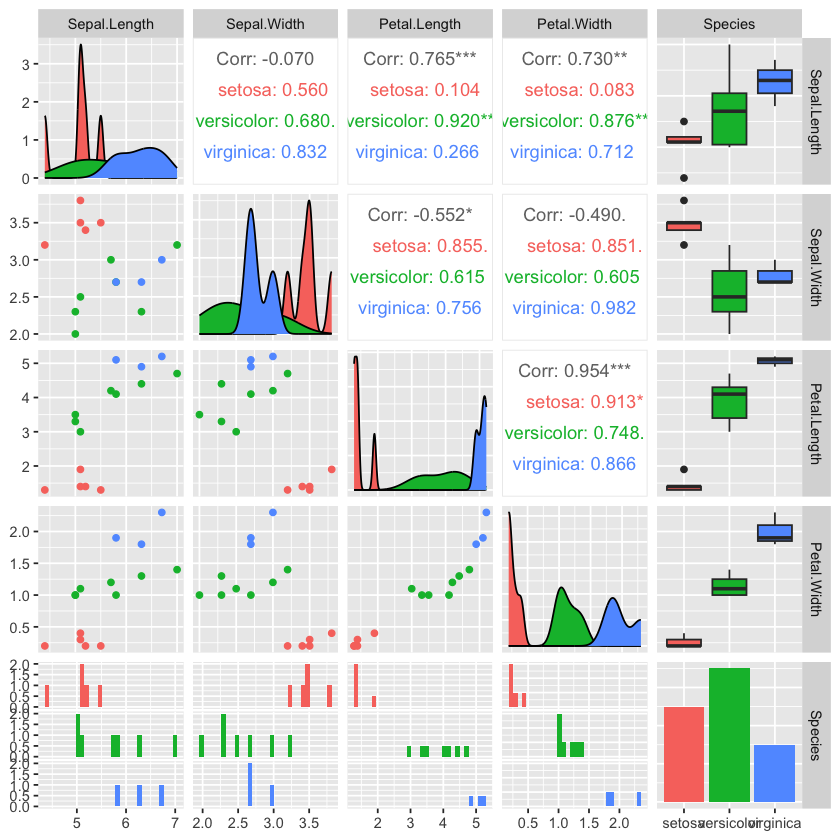

In [23]:
ggpairs(s, aes(color = Species))

### Stratified Sampling

[Stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling)
is a method of sampling from a population which can be partitioned into
subpopulations, while controlling the proportions of the subpopulation
in the resulting sample.

In the following, the subpopulations are the different types of species
and we want to make sure to sample the same number (5) flowers from
each. The library `sampling` provides a function for stratified
sampling. The column `ID_unit` in the resulting data.frame contains the
row numbers of the sampled rows. We can use `slice()` from `dplyr` to
select the sampled rows.

In [24]:
iris %>% head

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [25]:
iris %>% count(Species)

Species    n 
1 setosa     50
2 versicolor 50
3 virginica  50

In [26]:
cov(iris %>% select_if(is.numeric))

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  0.6857      -0.0424      1.27         0.516     
Sepal.Width  -0.0424       0.1900     -0.33        -0.122     
Petal.Length  1.2743      -0.3297      3.12         1.296     
Petal.Width   0.5163      -0.1216      1.30         0.581

In [27]:
cor(iris %>% select_if(is.numeric))

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.000       -0.118       0.872        0.818     
Sepal.Width  -0.118        1.000      -0.428       -0.366     
Petal.Length  0.872       -0.428       1.000        0.963     
Petal.Width   0.818       -0.366       0.963        1.000

In [29]:
library(sampling)
id2 <- strata(iris, stratanames = "Species", size = c(5,5,5), method = "srswor")
id2

Species    ID_unit Prob Stratum
7   setosa       7     0.1  1      
9   setosa       9     0.1  1      
10  setosa      10     0.1  1      
24  setosa      24     0.1  1      
48  setosa      48     0.1  1      
58  versicolor  58     0.1  2      
62  versicolor  62     0.1  2      
74  versicolor  74     0.1  2      
78  versicolor  78     0.1  2      
99  versicolor  99     0.1  2      
106 virginica  106     0.1  3      
107 virginica  107     0.1  3      
127 virginica  127     0.1  3      
135 virginica  135     0.1  3      
145 virginica  145     0.1  3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


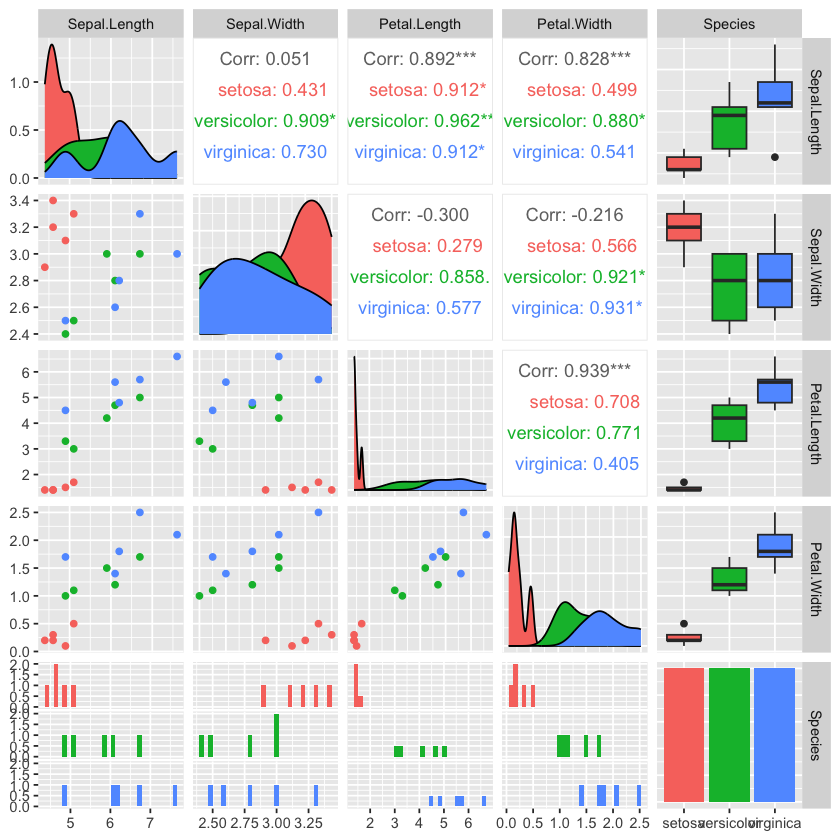

In [30]:
s2 <- iris %>% slice(id2$ID_unit)
ggpairs(s2, aes(color = Species))

## Features

### Dimensionality Reduction

#### Principal Components Analysis (PCA)

[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)
calculates principal components (a set of new orthonormal basis vectors
in the data space) from data points such that the first principal
component explains the most variability in the data, the second the next
most and so on. In data analysis, PCA is used to project
high-dimensional data points onto the first few (typically two)
principal components for visualization as a scatter plot and as
preprocessing for modeling (e.g., before k-means clustering). Points
that are closer together in the high-dimensional original space, tend
also be closer together when projected into the lower-dimensional space,

We can use an interactive 3-d plot (from package `plotly`) to look at
three of the four dimensions of the iris dataset. Note that it is hard
to visualize more than 3 dimensions.

In [32]:
# library(plotly) # I don't load the package because it's namespace clashes with select in dplyr.
plotly::plot_ly(iris, x = ~Sepal.Length, y = ~Petal.Length, z = ~Sepal.Width,
  size = ~Petal.Width, color = ~Species, type="scatter3d")

No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

Warning message:
“`line.width` does not currently support multiple values.”
Warning message:
“`line.width` does not currently support multiple values.”
Warning message:
“`line.width` does not currently support multiple values.”
No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

Warning message:
“`line.width` does not currently support multiple values.”
Warning message:
“`line.width` does not currently support multiple values.”
Warning message:
“`line.width` does not currently support multiple values.”


HTML widgets cannot be represented in plain text (need html)

The principal components can be calculated from a matrix using the
function `prcomp()`. We select all numeric columns (by unselecting the
species column) and convert the tibble into a matrix before the
calculation.

In [ ]:
update.packages("ggplot2")

In [33]:
pc <- iris %>% select(-Species) %>% as.matrix() %>% prcomp()
summary(pc)

Importance of components:
                         PC1    PC2    PC3     PC4
Standard deviation     2.056 0.4926 0.2797 0.15439
Proportion of Variance 0.925 0.0531 0.0171 0.00521
Cumulative Proportion  0.925 0.9777 0.9948 1.00000

How important is each principal component can also be seen using a
[scree plot](https://en.wikipedia.org/wiki/Scree_plot). The plot
function for the result of the `prcomp` function visualizes how much
variability in the data is explained by each additional principal
component.

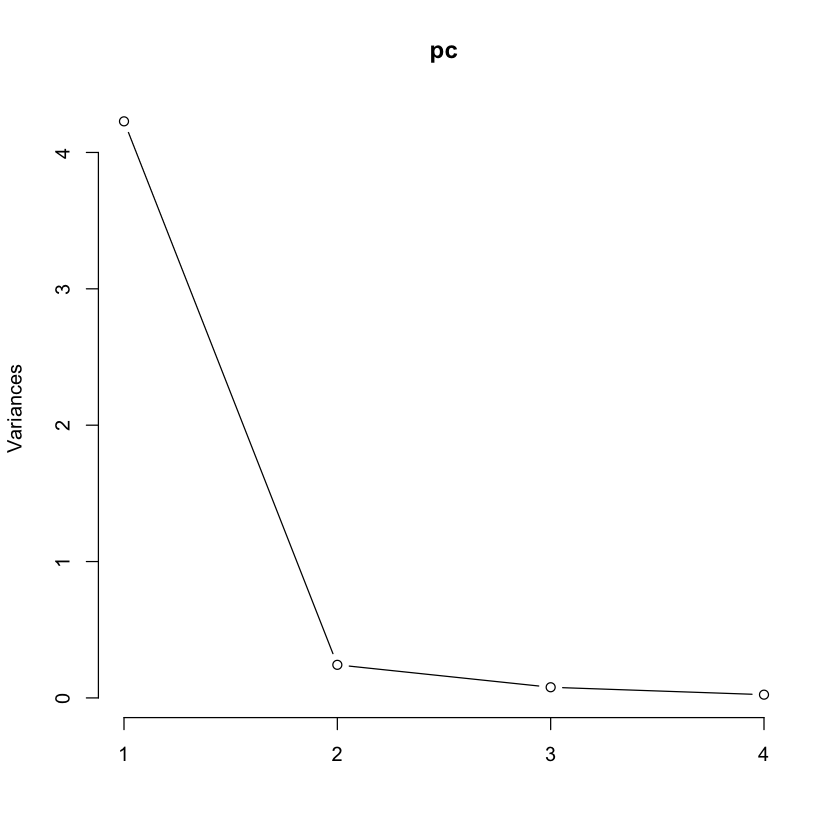

In [34]:
plot(pc, type = "line")

Note that the first principal component (PC1) explains most of the
variability in the iris dataset.

To find out what information is stored in the object `pc`, we can
inspect the raw object (display *str*ucture).

In [35]:
str(pc)

List of 5
 $ sdev    : num [1:4] 2.056 0.493 0.28 0.154
 $ rotation: num [1:4, 1:4] 0.3614 -0.0845 0.8567 0.3583 -0.6566 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : logi FALSE
 $ x       : num [1:150, 1:4] -2.68 -2.71 -2.89 -2.75 -2.73 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


The object `pc` (like most objects in R) is a list with a class
attribute. The list element `x` contains the data points projected on
the principal components. We can convert the matrix into a tibble and
add the species column from the original dataset back (since the rows
are in the same order), and then display the data projected on the first
two principal components.

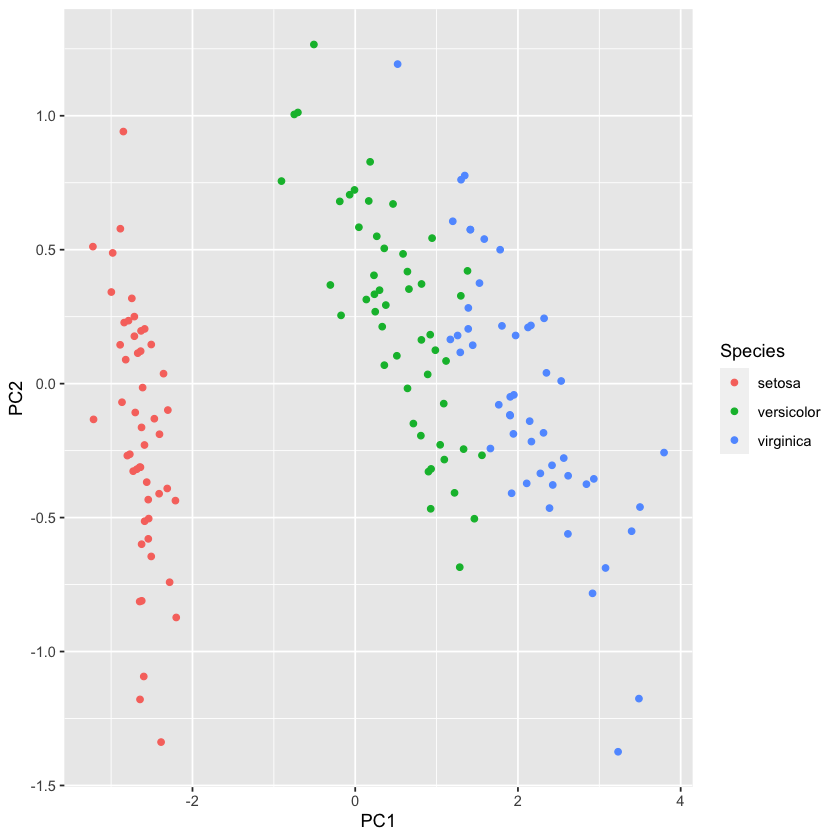

In [36]:
iris_projected <- as_tibble(pc$x) %>% add_column(Species = iris$Species)
ggplot(iris_projected, aes(x = PC1, y = PC2, color = Species)) + 
  geom_point()

Flowers that are displayed close together in this projection are also
close together in the original 4-dimensional space. Since the first
principal component represents most of the variability, we can also show
the data projected only on PC1.

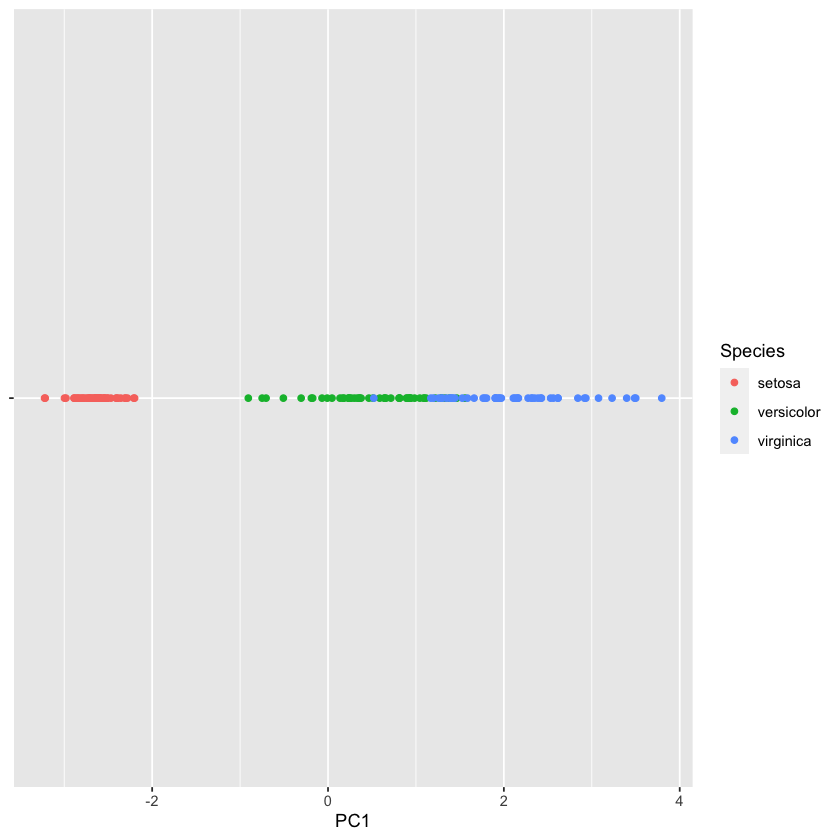

In [37]:
ggplot(iris_projected, 
  aes(x = PC1, y = 0, color = Species)) + 
  geom_point() +
  scale_y_continuous(expand=c(0,0)) +
  theme(axis.text.y = element_blank(),
      axis.title.y = element_blank()
  )

We see that we can perfectly separate the species Setosa using just the
first principal component. The other two species are harder to separate.

A plot of the projected data with the original axes added as arrows is
called a [biplot](https://en.wikipedia.org/wiki/Biplot). If the arrows
(original axes) align roughly with the axes of the projection, then they
are correlated (linearly dependent).

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



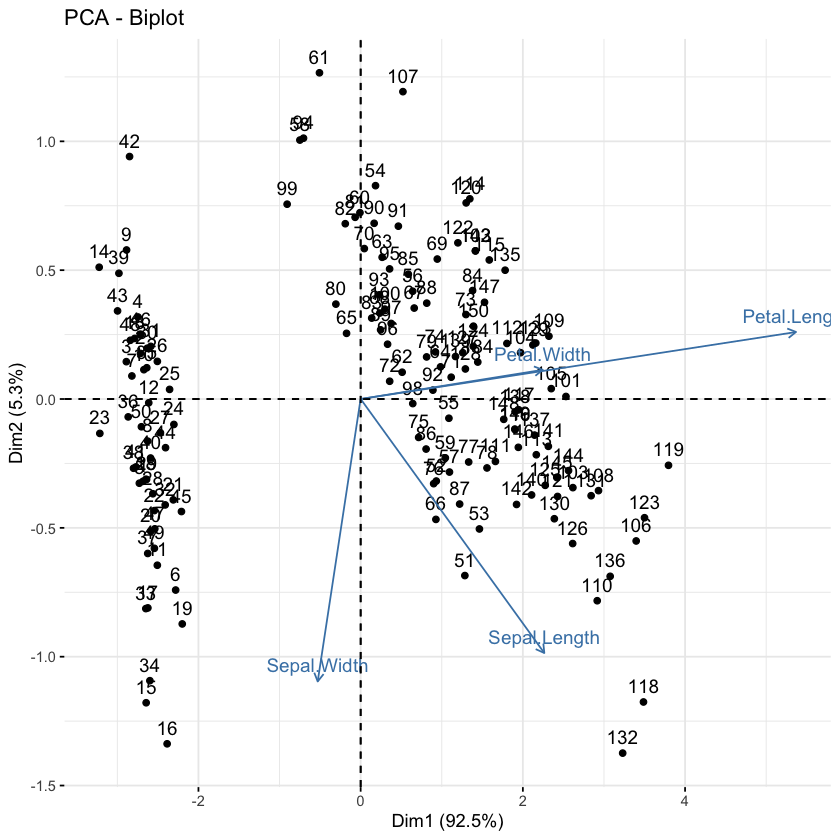

In [39]:
library(factoextra)
fviz_pca(pc)

We can also display only the old and new axes.

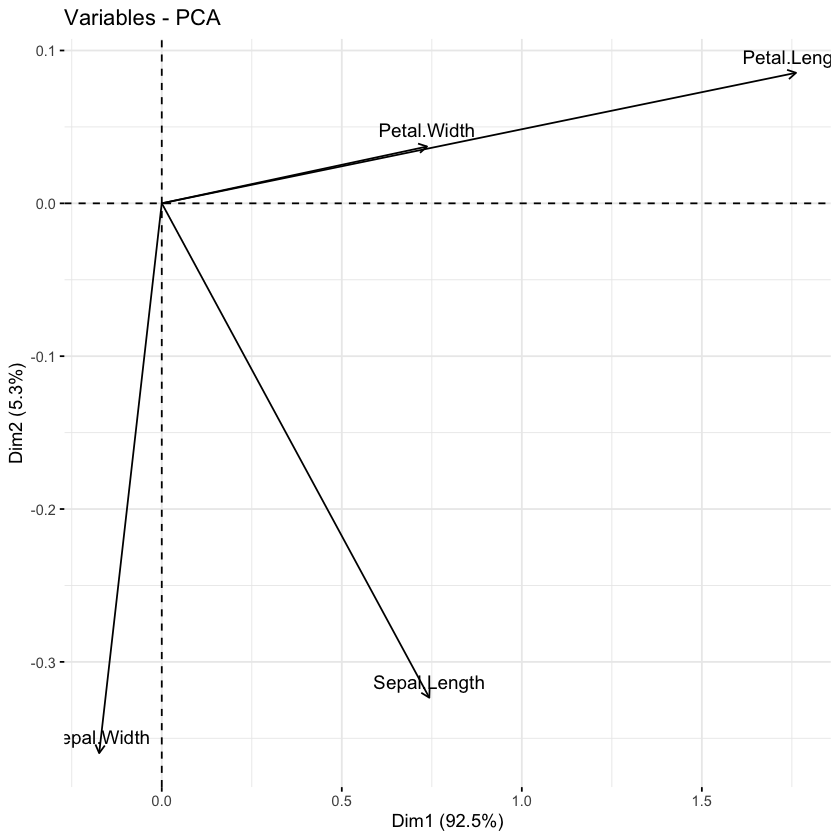

In [40]:
fviz_pca_var(pc)

We see Petal.Width and Petal.Length point in the same direction which
indicates that they are highly correlated. They are also roughly aligned
with PC1 (called Dim1 in the plot) which means that PC1 represents most
of the variability of these two variables. Sepal.Width is almost aligned
with the y-axis and therefore it is represented by PC2 (Dim2).
Petal.Width/Petal.Length and Sepal.Width are almost at 90 degrees,
indicating that they are close to uncorrelated. Sepal.Length is
correlated to all other variables and represented by both, PC1 and PC2
in the projection.

There exist other methods to embed data from higher dimensions into a
lower-dimensional space. A popular method to project data into lower
dimensions for visualization is **t-distributed stochastic neighbor
embedding (t-SNE)** available in package `Rtsne`.

#### Multi-Dimensional Scaling (MDS)

[MDS](https://en.wikipedia.org/wiki/Multidimensional_scaling) is similar
to PCA. Instead of data points, it starts with pairwise distances (i.e.,
a distance matrix) and produces a space where points are placed to
represent these distances as well as possible. The axes in this space
are called components and are similar to the principal components in
PCA.

First, we calculate a distance matrix (Euclidean distances) from the 4-d
space of the iris dataset.

In [41]:
d <- iris %>% select(-Species) %>% dist()

Metric (classic) MDS tries to construct a space where points with lower
distances are placed closer together. We project the data represented by
a distance matrix on `k = 2` dimensions.

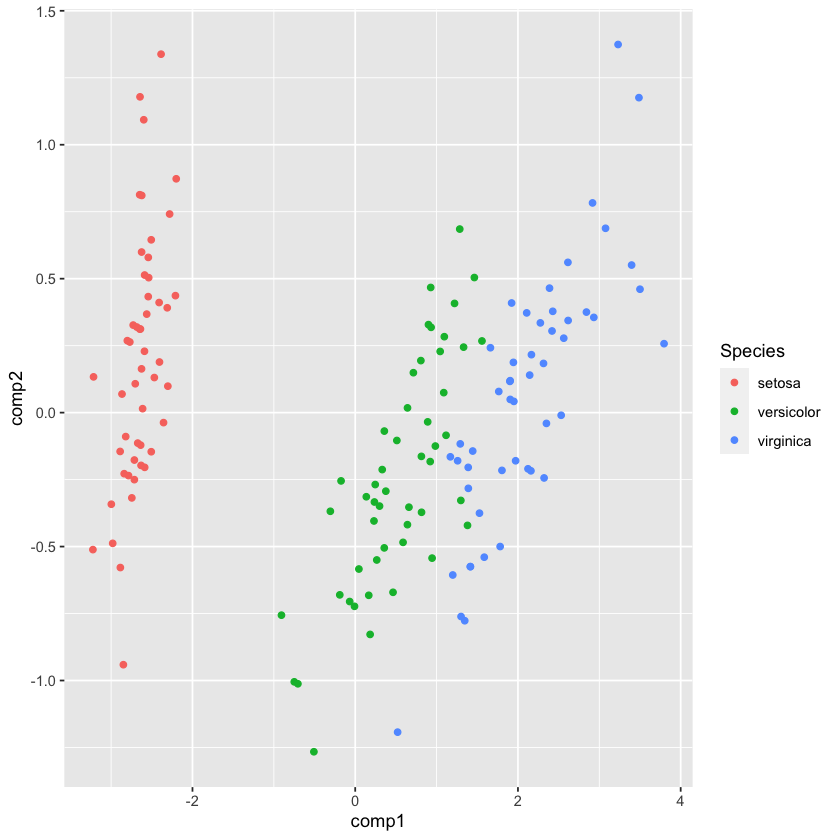

In [42]:
fit <- cmdscale(d, k = 2)
colnames(fit) <- c("comp1", "comp2")
fit <- as_tibble(fit) %>% add_column(Species = iris$Species)

ggplot(fit, aes(x = comp1, y = comp2, color = Species)) + geom_point()

The resulting projection is similar (except for rotation and reflection)
to the result of the projection using PCA.

#### Non-Parametric Multidimensional Scaling

Non-parametric multidimensional scaling performs MDS while relaxing the
need of linear relationships. Methods are available in package `MASS` as
functions `isoMDS()` and `sammon()`.

### Feature Selection

Feature selection is the process of identifying the features that are
used to create a model. We will talk about feature selection when we
discuss classification models in Chapter 3 in \[Feature Selection and
Feature Preparation\].

### Discretize Features

Some data mining methods require discrete data. Discretization converts
continuous features into discrete features. As an example, we will
discretize the continuous feature Petal.Width. Before we perform
discretization, we should look at the distribution and see if it gives
us an idea how we should group the continuous values into a set of
discrete values. A histogram visualizes the distribution of a single
continuous feature.

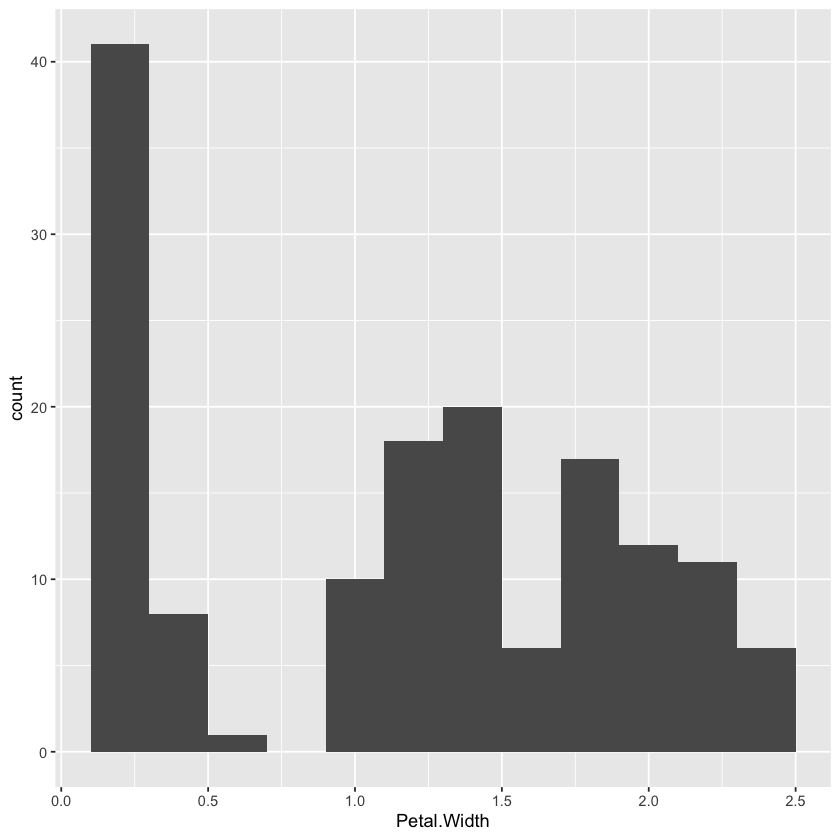

In [43]:
ggplot(iris, aes(x = Petal.Width)) + geom_histogram(binwidth = .2)

The bins in the histogram represent a discretization using a fixed bin
width. The R function `cut()` performs equal interval width
discretization.

In [44]:
iris %>% pull(Sepal.Width) %>% cut(breaks = 3)

[1] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (3.6,4.4] (2.8,3.6]
  [8] (2.8,3.6] (2.8,3.6] (2.8,3.6] (3.6,4.4] (2.8,3.6] (2.8,3.6] (2.8,3.6]
 [15] (3.6,4.4] (3.6,4.4] (3.6,4.4] (2.8,3.6] (3.6,4.4] (3.6,4.4] (2.8,3.6]
 [22] (3.6,4.4] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6]
 [29] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (3.6,4.4] (3.6,4.4] (2.8,3.6]
 [36] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2,2.8]  
 [43] (2.8,3.6] (2.8,3.6] (3.6,4.4] (2.8,3.6] (3.6,4.4] (2.8,3.6] (3.6,4.4]
 [50] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2,2.8]   (2,2.8]   (2,2.8]  
 [57] (2.8,3.6] (2,2.8]   (2.8,3.6] (2,2.8]   (2,2.8]   (2.8,3.6] (2,2.8]  
 [64] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2,2.8]   (2,2.8]   (2,2.8]  
 [71] (2.8,3.6] (2,2.8]   (2,2.8]   (2,2.8]   (2.8,3.6] (2.8,3.6] (2,2.8]  
 [78] (2.8,3.6] (2.8,3.6] (2,2.8]   (2,2.8]   (2,2.8]   (2,2.8]   (2,2.8]  
 [85] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2,2.8]   (2.8,3.6] (2,2.8]   (2,2.8]  
 [92] (2.8,3.6] (2,2.8]   (2,2.8]   (2,2.8]   (2.8,3.6] (2.8,3.6] (2.8,3.6]
 [99] (2,2.8]   (2,2.8]   (2.8,3.6] (2,2.8]   (2.8,3.6] (2.8,3.6] (2.8,3.6]
[106] (2.8,3.6] (2,2.8]   (2.8,3.6] (2,2.8]   (2.8,3.6] (2.8,3.6] (2,2.8]  
[113] (2.8,3.6] (2,2.8]   (2,2.8]   (2.8,3.6] (2.8,3.6] (3.6,4.4] (2,2.8]  
[120] (2,2.8]   (2.8,3.6] (2,2.8]   (2,2.8]   (2,2.8]   (2.8,3.6] (2.8,3.6]
[127] (2,2.8]   (2.8,3.6] (2,2.8]   (2.8,3.6] (2,2.8]   (3.6,4.4] (2,2.8]  
[134] (2,2.8]   (2,2.8]   (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6] (2.8,3.6]
[141] (2.8,3.6] (2.8,3.6] (2,2.8]   (2.8,3.6] (2.8,3.6] (2.8,3.6] (2,2.8]  
[148] (2.8,3.6] (2.8,3.6] (2.8,3.6]
Levels: (2,2.8] (2.8,3.6] (3.6,4.4]

Other discretization methods include equal frequency discretization or
using k-means clustering. These methods are implemented by several R
packages. We use here the implementation in package `arules` and
visualize the results as histograms with blue lines to separate
intervals assigned to each discrete value.

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




[1] [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9)
  [8] [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9)
 [15] [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9)
 [22] [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9)
 [29] [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9)
 [36] [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9)
 [43] [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9) [0.1,0.9)
 [50] [0.1,0.9) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7)
 [57] [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7)
 [64] [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7)
 [71] [1.7,2.5] [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7)
 [78] [1.7,2.5] [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7)
 [85] [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7)
 [92] [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7) [0.9,1.7)
 [99] [0.9,1.7) [0.9,1.7) [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5]
[106] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5]
[113] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5]
[120] [0.9,1.7) [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5]
[127] [1.7,2.5] [1.7,2.5] [1.7,2.5] [0.9,1.7) [1.7,2.5] [1.7,2.5] [1.7,2.5]
[134] [0.9,1.7) [0.9,1.7) [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5]
[141] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5] [1.7,2.5]
[148] [1.7,2.5] [1.7,2.5] [1.7,2.5]
attr(,"discretized:breaks")
[1] 0.1 0.9 1.7 2.5
attr(,"discretized:method")
[1] interval
Levels: [0.1,0.9) [0.9,1.7) [1.7,2.5]

[1] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
  [7] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
 [13] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
 [19] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
 [25] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
 [31] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
 [37] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
 [43] [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867) [0.1,0.867)
 [49] [0.1,0.867) [0.1,0.867) [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6)
 [55] [0.867,1.6) [0.867,1.6) [1.6,2.5]   [0.867,1.6) [0.867,1.6) [0.867,1.6)
 [61] [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6)
 [67] [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [1.6,2.5]   [0.867,1.6)
 [73] [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [1.6,2.5]  
 [79] [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [1.6,2.5]  
 [85] [0.867,1.6) [1.6,2.5]   [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6)
 [91] [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6)
 [97] [0.867,1.6) [0.867,1.6) [0.867,1.6) [0.867,1.6) [1.6,2.5]   [1.6,2.5]  
[103] [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]  
[109] [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]  
[115] [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [0.867,1.6)
[121] [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]  
[127] [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]  
[133] [1.6,2.5]   [0.867,1.6) [0.867,1.6) [1.6,2.5]   [1.6,2.5]   [1.6,2.5]  
[139] [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]  
[145] [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]   [1.6,2.5]  
attr(,"discretized:breaks")
[1] 0.100 0.867 1.600 2.500
attr(,"discretized:method")
[1] frequency
Levels: [0.1,0.867) [0.867,1.6) [1.6,2.5]

[1] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
  [6] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [11] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [16] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [21] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [26] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [31] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [36] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [41] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [46] [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792)  [0.1,0.792) 
 [51] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [56] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [61] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [66] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [71] [1.71,2.5]   [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [76] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [81] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [86] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [91] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
 [96] [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71) [0.792,1.71)
[101] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]  
[106] [1.71,2.5]   [0.792,1.71) [1.71,2.5]   [1.71,2.5]   [1.71,2.5]  
[111] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]  
[116] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [0.792,1.71)
[121] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]  
[126] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [0.792,1.71)
[131] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [0.792,1.71) [0.792,1.71)
[136] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]  
[141] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]  
[146] [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]   [1.71,2.5]  
attr(,"discretized:breaks")
[1] 0.100 0.792 1.705 2.500
attr(,"discretized:method")
[1] cluster
Levels: [0.1,0.792) [0.792,1.71) [1.71,2.5]

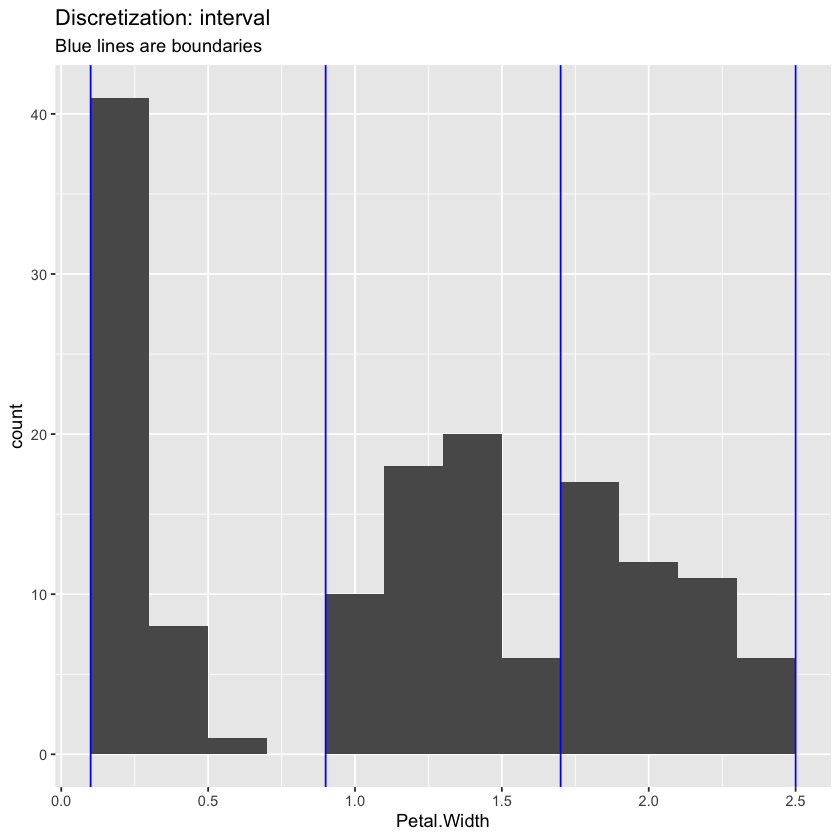

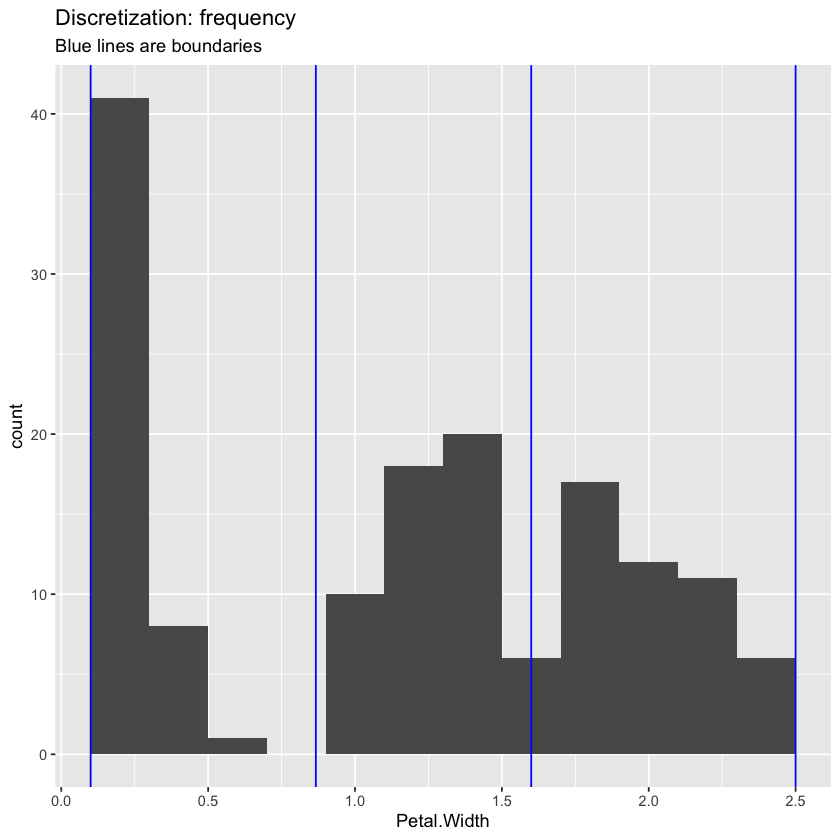

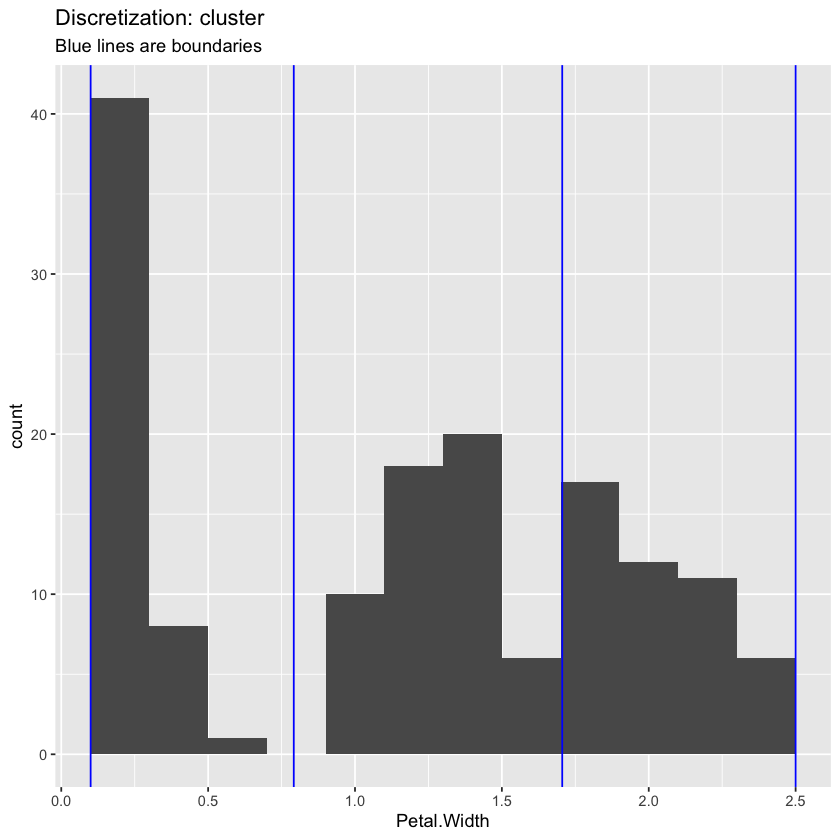

In [46]:
library(arules)
iris %>% pull(Petal.Width) %>% discretize(method = "interval", breaks = 3)
iris %>% pull(Petal.Width) %>% discretize(method = "frequency", breaks = 3)
iris %>% pull(Petal.Width) %>% discretize(method = "cluster", breaks = 3)

ggplot(iris, aes(Petal.Width)) + geom_histogram(binwidth = .2) +
  geom_vline(xintercept =
      iris %>% pull(Petal.Width) %>% discretize(method = "interval", breaks = 3, onlycuts = TRUE),
    color = "blue") +
  labs(title = "Discretization: interval", subtitle = "Blue lines are boundaries")

ggplot(iris, aes(Petal.Width)) + geom_histogram(binwidth = .2) +
  geom_vline(xintercept =
      iris %>% pull(Petal.Width) %>% discretize(method = "frequency", breaks = 3, onlycuts = TRUE),
    color = "blue") +
  labs(title = "Discretization: frequency", subtitle = "Blue lines are boundaries")

ggplot(iris, aes(Petal.Width)) + geom_histogram(binwidth = .2) +
  geom_vline(xintercept =
      iris %>% pull(Petal.Width) %>% discretize(method = "cluster", breaks = 3, onlycuts = TRUE),
    color = "blue") +
  labs(title = "Discretization: cluster", subtitle = "Blue lines are boundaries")

The user needs to decide on the number of intervals and the used method.

### Standardize Data

Standardizing (scaling, normalizing) the range of features values is
important to make them comparable. The most popular method is to convert
the values of each feature to
[z-scores](https://en.wikipedia.org/wiki/Standard_score). by subtracting
the mean (centering) and dividing by the standard deviation (scaling).
The standardized feature will have a mean of zero and are measured in
standard deviations from the mean. Positive values indicate how many
standard deviation the original feature value was above the average.
Negative standardized values indicate below-average values.

*Note:* tidyverse currently does not have a simple scale function, so I
make one that provides a wrapper for the standard scale function in R:

In [50]:
iris.scaled <- iris %>% mutate_if(is.numeric, scale)

summary(iris.scaled)
iris.scaled

 Sepal.Length.V1   Sepal.Width.V1  Petal.Length.V1   Petal.Width.V1 
 Min.   :-1.864   Min.   :-2.426   Min.   :-1.562   Min.   :-1.442  
 1st Qu.:-0.898   1st Qu.:-0.590   1st Qu.:-1.222   1st Qu.:-1.180  
 Median :-0.052   Median :-0.132   Median : 0.335   Median : 0.132  
 Mean   : 0.000   Mean   : 0.000   Mean   : 0.000   Mean   : 0.000  
 3rd Qu.: 0.672   3rd Qu.: 0.557   3rd Qu.: 0.760   3rd Qu.: 0.788  
 Max.   : 2.484   Max.   : 3.080   Max.   : 1.780   Max.   : 1.706  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Sepal.Length Sepal.Width Petal.Length Petal.Width Species  
1   -0.8977       1.0156     -1.34        -1.311      setosa   
2   -1.1392      -0.1315     -1.34        -1.311      setosa   
3   -1.3807       0.3273     -1.39        -1.311      setosa   
4   -1.5015       0.0979     -1.28        -1.311      setosa   
5   -1.0184       1.2450     -1.34        -1.311      setosa   
6   -0.5354       1.9333     -1.17        -1.049      setosa   
7   -1.5015       0.7862     -1.34        -1.180      setosa   
8   -1.0184       0.7862     -1.28        -1.311      setosa   
9   -1.7430      -0.3610     -1.34        -1.311      setosa   
10  -1.1392       0.0979     -1.28        -1.442      setosa   
11  -0.5354       1.4745     -1.28        -1.311      setosa   
12  -1.2600       0.7862     -1.22        -1.311      setosa   
13  -1.2600      -0.1315     -1.34        -1.442      setosa   
14  -1.8638      -0.1315     -1.51        -1.442      setosa   
15  -0.0523       2.1627     -1.45        -1.311      setosa   
16  -0.1731       3.0805     -1.28        -1.049      setosa   
17  -0.5354       1.9333     -1.39        -1.049      setosa   
18  -0.8977       1.0156     -1.34        -1.180      setosa   
19  -0.1731       1.7039     -1.17        -1.180      setosa   
20  -0.8977       1.7039     -1.28        -1.180      setosa   
21  -0.5354       0.7862     -1.17        -1.311      setosa   
22  -0.8977       1.4745     -1.28        -1.049      setosa   
23  -1.5015       1.2450     -1.56        -1.311      setosa   
24  -0.8977       0.5567     -1.17        -0.917      setosa   
25  -1.2600       0.7862     -1.05        -1.311      setosa   
26  -1.0184      -0.1315     -1.22        -1.311      setosa   
27  -1.0184       0.7862     -1.22        -1.049      setosa   
28  -0.7769       1.0156     -1.28        -1.311      setosa   
29  -0.7769       0.7862     -1.34        -1.311      setosa   
30  -1.3807       0.3273     -1.22        -1.311      setosa   
⋮   ⋮            ⋮           ⋮            ⋮           ⋮        
121  1.2761       0.3273     1.100        1.444       virginica
122 -0.2939      -0.5904     0.647        1.050       virginica
123  2.2422      -0.5904     1.667        1.050       virginica
124  0.5515      -0.8198     0.647        0.788       virginica
125  1.0345       0.5567     1.100        1.182       virginica
126  1.6384       0.3273     1.270        0.788       virginica
127  0.4307      -0.5904     0.590        0.788       virginica
128  0.3100      -0.1315     0.647        0.788       virginica
129  0.6722      -0.5904     1.043        1.182       virginica
130  1.6384      -0.1315     1.157        0.526       virginica
131  1.8799      -0.5904     1.327        0.919       virginica
132  2.4837       1.7039     1.497        1.050       virginica
133  0.6722      -0.5904     1.043        1.313       virginica
134  0.5515      -0.5904     0.760        0.394       virginica
135  0.3100      -1.0493     1.043        0.263       virginica
136  2.2422      -0.1315     1.327        1.444       virginica
137  0.5515       0.7862     1.043        1.575       virginica
138  0.6722       0.0979     0.987        0.788       virginica
139  0.1892      -0.1315     0.590        0.788       virginica
140  1.2761       0.0979     0.930        1.182       virginica
141  1.0345       0.0979     1.043        1.575       virginica
142  1.2761       0.0979     0.760        1.444       virginica
143 -0.0523      -0.8198     0.760        0.919       virginica
144  1.1553       0.3273     1.213        1.444       virginica
145  1.0345       0.5567     1.100        1.706       virginica
146  1.0345      -0.1315     0.817        1.444       virginica
147  0.5515      -1.2787     0.704        0.919       virginica
148  0.7930      -0.1315     0.817        1.050       virginica
149  0.4307       0.7862     0.930        1.444       virginica
150  0.0684      -0.1315     0.760        0.788       virginica

The standardized feature has a mean of zero and most "normal" values
will fall in the range \[-3,3\] (standard deviations).

## Proximities: Similarities and Distances

R stores proximity as dissimilarities/distances matrices. Similarities
are first converted to dissimilarities. Distances are symmetric, i.e.,
the distance from A to B is the same as the distance from B to A. R
therefore stores only a triangle (typically the lower triangle) of the
distance matrix.

### Minkowsky Distances

The [Minkowsky
distance](https://en.wikipedia.org/wiki/Minkowski_distance) is a family
of metric distances including Euclidean and Manhattan distance. To avoid
one feature to dominate the distance calculation, scaled data is
typically used. We select the first 5 flowers for this example.

In [51]:
iris_sample <- iris.scaled %>% select(-Species) %>% slice(1:5)
iris_sample

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 -0.898        1.0156     -1.34        -1.31      
2 -1.139       -0.1315     -1.34        -1.31      
3 -1.381        0.3273     -1.39        -1.31      
4 -1.501        0.0979     -1.28        -1.31      
5 -1.018        1.2450     -1.34        -1.31

Different types of Minkowsky distance matrices between the first 5
flowers can be calculated using `dist()`.

In [52]:
dist(iris_sample, method = "euclidean")
dist(iris_sample, method = "manhattan")
dist(iris_sample, method = "maximum")

      1     2     3     4
2 1.172                  
3 0.843 0.522            
4 1.100 0.433 0.283      
5 0.259 1.382 0.988 1.246

      1     2     3     4
2 1.389                  
3 1.228 0.757            
4 1.578 0.648 0.463      
5 0.350 1.497 1.337 1.687

      1     2     3     4
2 1.147                  
3 0.688 0.459            
4 0.918 0.362 0.229      
5 0.229 1.377 0.918 1.147

We see that only the lower triangle of the distance matrices are stored
(note that rows start with row 2).

### Distances for Binary Data

Binary data can be encodes as `0` and `1` (numeric) or `TRUE` and
`FALSE` (logical).

In [53]:
b <- rbind(
  c(0,0,0,1,1,1,1,0,0,1),
  c(0,0,1,1,1,0,0,1,0,0)
  )
b

b_logical <- apply(b, MARGIN = 2, as.logical)
b_logical

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,] 0    0    0    1    1    1    1    0    0    1    
[2,] 0    0    1    1    1    0    0    1    0    0

[,1]  [,2]  [,3]  [,4] [,5] [,6]  [,7]  [,8]  [,9]  [,10]
[1,] FALSE FALSE FALSE TRUE TRUE  TRUE  TRUE FALSE FALSE  TRUE
[2,] FALSE FALSE  TRUE TRUE TRUE FALSE FALSE  TRUE FALSE FALSE

#### Hamming Distance

The [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance)
is the number of mismatches between two binary vectors. For 0-1 data
this is equivalent to the Manhattan distance and also the squared
Euclidean distance.

In [ ]:
dist(b, method = "manhattan")
dist(b, method = "euclidean")^2

#### Jaccard Index

The [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index) is a
similarity measure that focuses on matching 1s. R converts the
similarity into a dissimilarity using $d_{J} = 1 - s_{J}$.

In [ ]:
dist(b, method = "binary")

### Distances for Mixed Data

Most distance measures work only on numeric data. Often, we have a
mixture of numbers and nominal or ordinal features like this data:

In [54]:
people <- tibble(
  height = c(      160,    185,    170),
  weight = c(       52,     90,     75),
  sex    = c( "female", "male", "male")
)
people

height weight sex   
1 160    52     female
2 185    90     male  
3 170    75     male

It is important that nominal features are stored as factors and not
character (`<chr>`).

In [55]:
people <- people %>% mutate_if(is.character, factor)
people

height weight sex   
1 160    52     female
2 185    90     male  
3 170    75     male

#### Gower's Coefficient

The Gower's coefficient of similarity works with mixed data by
calculating the appropriate similarity for each feature and then
aggregating them into a single measure. The package `proxy` implements
Gower's coefficient converted into a distance.

In [56]:
library(proxy)
d_Gower <- dist(people, method = "Gower")
d_Gower


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




      1     2
2 1.000      
3 0.668 0.332

Gower's coefficient calculation implicitly scales the data because it
calculates distances on each feature individually, so there is no need
to scale the data first.

#### Using Euclidean Distance with Mixed Data

Sometimes methods (e.g., k-means) can only use Euclidean distance. In
this case, nominal features can be converted into 0-1 dummy variables.
After scaling, Euclidean distance will result in a usable distance
measure.

We use package `caret` to create dummy variables.

In [57]:
library(caret)
data_dummy <- dummyVars(~., people) %>% predict(people)
data_dummy

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:sampling’:

    cluster


The following object is masked from ‘package:purrr’:

    lift




height weight sex.female sex.male
1 160    52     1          0       
2 185    90     0          1       
3 170    75     0          1

Note that feature sex has now two columns. If we want that height,
weight and sex have the same influence on the distance measure, then we
need to weight the sex columns by 1/2 after scaling.

In [58]:
weight_matrix <- matrix(c(1, 1, 1/2, 1/2), ncol = 4, nrow = nrow(data_dummy), byrow = TRUE)
data_dummy_scaled <- scale(data_dummy) * weight_matrix

d_dummy <- dist(data_dummy_scaled)
d_dummy

     1    2
2 3.06     
3 1.89 1.43

The distance using dummy variables is consistent with Gower's distance.
However, note that Gower's distance is scaled between 0 and 1 while the
Euclidean distance is not.

Don't know how to automatically pick scale for object of type <dist>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <dist>. Defaulting to continuous.
`geom_smooth()` using formula = 'y ~ x'


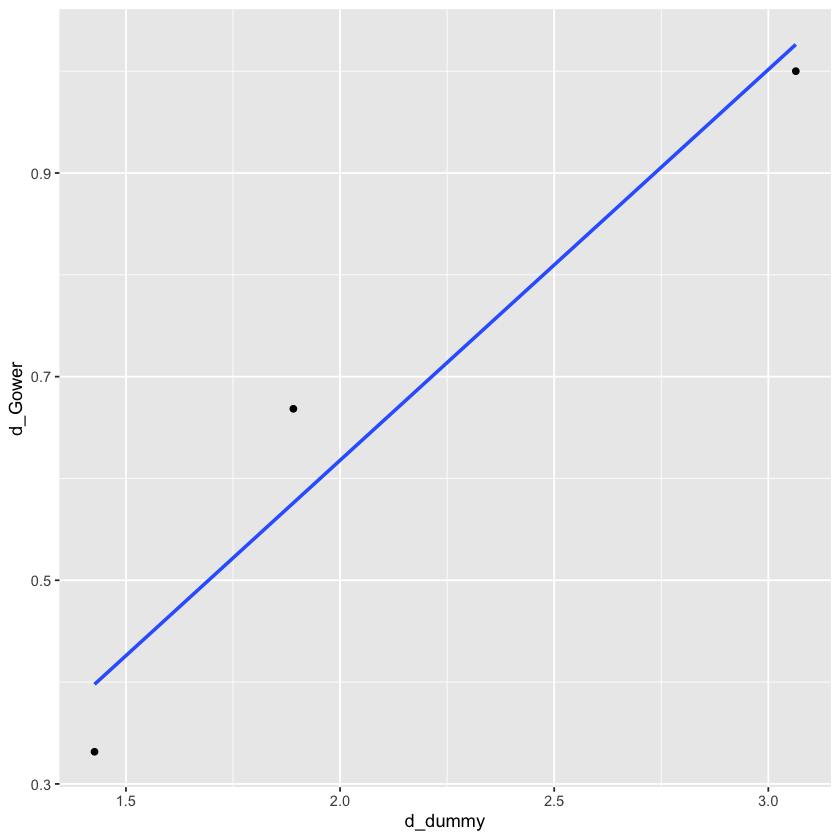

In [59]:
ggplot(tibble(d_dummy, d_Gower), aes(x = d_dummy, y = d_Gower)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

### Additional proximity Measures Available in Package proxy

The package `proxy` implements a wide array of distances.

In [60]:
library(proxy)
pr_DB$get_entry_names()

[1] "Jaccard"         "Kulczynski1"     "Kulczynski2"     "Mountford"      
 [5] "Fager"           "Russel"          "simple matching" "Hamman"         
 [9] "Faith"           "Tanimoto"        "Dice"            "Phi"            
[13] "Stiles"          "Michael"         "Mozley"          "Yule"           
[17] "Yule2"           "Ochiai"          "Simpson"         "Braun-Blanquet" 
[21] "cosine"          "angular"         "eJaccard"        "eDice"          
[25] "correlation"     "Chi-squared"     "Phi-squared"     "Tschuprow"      
[29] "Cramer"          "Pearson"         "Gower"           "Euclidean"      
[33] "Mahalanobis"     "Bhjattacharyya"  "Manhattan"       "supremum"       
[37] "Minkowski"       "Canberra"        "Wave"            "divergence"     
[41] "Kullback"        "Bray"            "Soergel"         "Levenshtein"    
[45] "Podani"          "Chord"           "Geodesic"        "Whittaker"      
[49] "Hellinger"       "fJaccard"

Note that loading the package `proxy` replaces the `dist` function in R.
You can specify which dist function to use by specifying the package in
the call. For example `stats::dist()` calls the default function in R
(the package `stats` is part of R) while `proxy::dist()` calls the
version in the package `proxy`.

## Relationships Between Features

### Correlation

Correlation can be used for ratio/interval scaled features. We typically
think of the [Pearson correlation
coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
between features (columns).

In [61]:
cc <- iris %>% select(-Species) %>% cor()
cc

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.000       -0.118       0.872        0.818     
Sepal.Width  -0.118        1.000      -0.428       -0.366     
Petal.Length  0.872       -0.428       1.000        0.963     
Petal.Width   0.818       -0.366       0.963        1.000

`cor` calculates a correlation matrix with pairwise correlations between
features. Correlation matrices are symmetric, but different to
distances, the whole matrix is stored.

The correlation between Petal.Length and Petal.Width can be visualized
using a scatter plot.

`geom_smooth()` using formula = 'y ~ x'


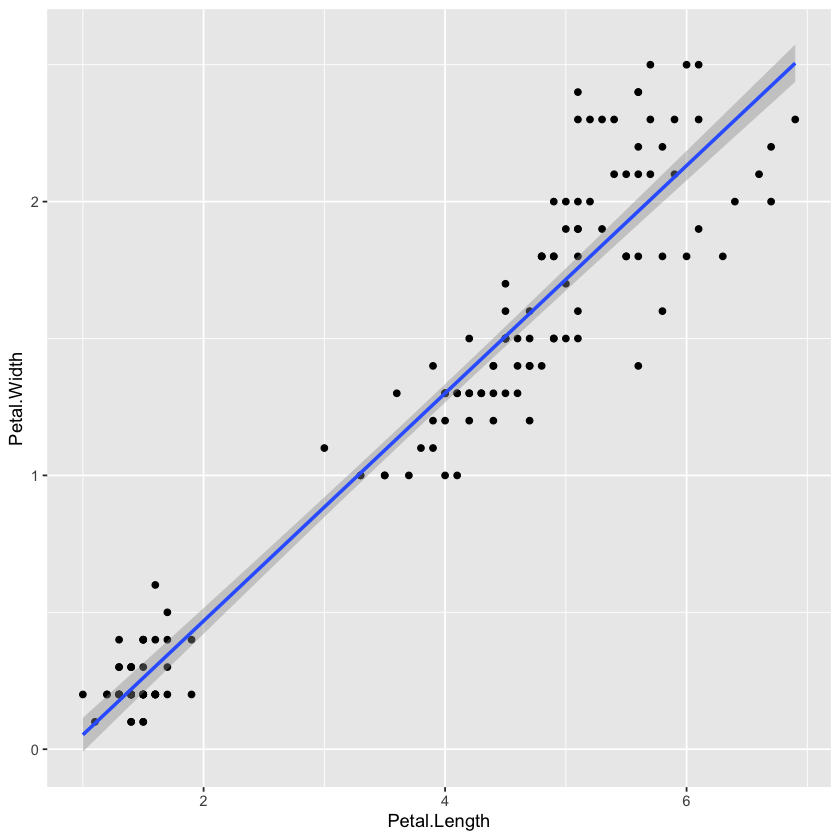

In [62]:
ggplot(iris, aes(Petal.Length, Petal.Width)) + 
  geom_point() +
  geom_smooth(method = "lm")

`geom_smooth` adds a regression line by fitting a linear model (`lm`).
Most points are close to this line indicating strong linear dependence
(i.e., high correlation).

We can calculate individual correlations by specifying two vectors.

In [63]:
with(iris, cor(Petal.Length, Petal.Width))

[1] 0.963

*Note:* `with` lets you use columns using just their names and
`with(iris, cor(Petal.Length, Petal.Width))` is the same as
`cor(iris$Petal.Length, iris$Petal.Width)`.

Finally, we can test if a correlation is significantly different from
zero.

In [64]:
with(iris, cor.test(Petal.Length, Petal.Width))


	Pearson's product-moment correlation

data:  Petal.Length and Petal.Width
t = 43, df = 148, p-value <2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.949 0.973
sample estimates:
  cor 
0.963 


A small p-value (less than 0.05) indicates that the observed correlation
is significantly different from zero. This can also be seen by the fact
that the 95% confidence interval does not span zero.

Sepal.Length and Sepal.Width show little correlation:

`{ r} ggplot(iris, aes(Sepal.Length, Sepal.Width)) + geom_point() +   geom_smooth(method = "lm") with(iris, cor(Sepal.Length, Sepal.Width)) with(iris, cor.test(Sepal.Length, Sepal.Width))`

### Rank Correlation

Rank correlation is used for ordinal features or if the correlation is
not linear. To show this, we first convert the continuous features in
the Iris dataset into ordered factors (ordinal) with three levels using
the function `cut`.

In [65]:
iris_ord <- iris %>% mutate_if(is.numeric,
  function(x) cut(x, 3, labels = c("short", "medium", "long"), ordered = TRUE))

iris_ord
summary(iris_ord)
iris_ord %>% pull(Sepal.Length)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species  
1   short        medium      short        short       setosa   
2   short        medium      short        short       setosa   
3   short        medium      short        short       setosa   
4   short        medium      short        short       setosa   
5   short        medium      short        short       setosa   
6   short        long        short        short       setosa   
7   short        medium      short        short       setosa   
8   short        medium      short        short       setosa   
9   short        medium      short        short       setosa   
10  short        medium      short        short       setosa   
11  short        long        short        short       setosa   
12  short        medium      short        short       setosa   
13  short        medium      short        short       setosa   
14  short        medium      short        short       setosa   
15  medium       long        short        short       setosa   
16  medium       long        short        short       setosa   
17  short        long        short        short       setosa   
18  short        medium      short        short       setosa   
19  medium       long        short        short       setosa   
20  short        long        short        short       setosa   
21  short        medium      short        short       setosa   
22  short        long        short        short       setosa   
23  short        medium      short        short       setosa   
24  short        medium      short        short       setosa   
25  short        medium      short        short       setosa   
26  short        medium      short        short       setosa   
27  short        medium      short        short       setosa   
28  short        medium      short        short       setosa   
29  short        medium      short        short       setosa   
30  short        medium      short        short       setosa   
⋮   ⋮            ⋮           ⋮            ⋮           ⋮        
121 long         medium      long         long        virginica
122 medium       short       medium       long        virginica
123 long         short       long         long        virginica
124 medium       short       medium       long        virginica
125 medium       medium      long         long        virginica
126 long         medium      long         long        virginica
127 medium       short       medium       long        virginica
128 medium       medium      medium       long        virginica
129 medium       short       long         long        virginica
130 long         medium      long         medium      virginica
131 long         short       long         long        virginica
132 long         long        long         long        virginica
133 medium       short       long         long        virginica
134 medium       short       long         medium      virginica
135 medium       short       long         medium      virginica
136 long         medium      long         long        virginica
137 medium       medium      long         long        virginica
138 medium       medium      long         long        virginica
139 medium       medium      medium       long        virginica
140 long         medium      long         long        virginica
141 medium       medium      long         long        virginica
142 long         medium      long         long        virginica
143 medium       short       long         long        virginica
144 long         medium      long         long        virginica
145 medium       medium      long         long        virginica
146 medium       medium      long         long        virginica
147 medium       short       long         long        virginica
148 medium       medium      long         long        virginica
149 medium       medium      long         long        virginica
150 medium       medium      long         long        virginica

 Sepal.Length Sepal.Width Petal.Length Petal.Width       Species  
 short :59    short :47   short :50    short :50   setosa    :50  
 medium:71    medium:88   medium:54    medium:54   versicolor:50  
 long  :20    long  :15   long  :46    long  :46   virginica :50  

[1] short  short  short  short  short  short  short  short  short  short 
 [11] short  short  short  short  medium medium short  short  medium short 
 [21] short  short  short  short  short  short  short  short  short  short 
 [31] short  short  short  short  short  short  short  short  short  short 
 [41] short  short  short  short  short  short  short  short  short  short 
 [51] long   medium long   short  medium medium medium short  medium short 
 [61] short  medium medium medium medium medium medium medium medium medium
 [71] medium medium medium medium medium medium long   medium medium medium
 [81] short  short  medium medium short  medium medium medium medium short 
 [91] short  medium medium short  medium medium medium medium short  medium
[101] medium medium long   medium medium long   short  long   medium long  
[111] medium medium long   medium medium medium medium long   long   medium
[121] long   medium long   medium medium long   medium medium medium long  
[131] long   long   medium medium medium long   medium medium medium long  
[141] medium long   medium long   medium medium medium medium medium medium
Levels: short < medium < long

Two measures for rank correlation are Kendall's Tau and Spearman's Rho.

[Kendall's Tau Rank Correlation
Coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)
measures the agreement between two rankings (i.e., ordinal features).

In [66]:
iris_ord %>% select(-Species) %>% sapply(xtfrm) %>% cor(method = "kendall")

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.000       -0.144       0.742        0.730     
Sepal.Width  -0.144        1.000      -0.330       -0.315     
Petal.Length  0.742       -0.330       1.000        0.920     
Petal.Width   0.730       -0.315       0.920        1.000

**Note:** We have to use `xtfrm` to transform the ordered factors into
ranks, i.e., numbers representing the order.

[Spearman's
Rho](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
is equal to the Pearson correlation between the rank values of those two
features.

In [67]:
iris_ord %>% select(-Species) %>% sapply(xtfrm) %>% cor(method = "spearman")

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.000       -0.157       0.794        0.784     
Sepal.Width  -0.157        1.000      -0.366       -0.352     
Petal.Length  0.794       -0.366       1.000        0.940     
Petal.Width   0.784       -0.352       0.940        1.000

Spearman's Rho is much faster to compute on large datasets then
Kendall's Tau.

Comparing the rank correlation results with the Pearson correlation on
the original data shows that they are very similar. This indicates that
discretizing data does not result in the loss of too much information.

In [68]:
iris %>% select(-Species) %>% cor()

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.000       -0.118       0.872        0.818     
Sepal.Width  -0.118        1.000      -0.428       -0.366     
Petal.Length  0.872       -0.428       1.000        0.963     
Petal.Width   0.818       -0.366       0.963        1.000

## Density Estimation

[Density estimation](https://en.wikipedia.org/wiki/Density_estimation)
constructions an estimate the probability density function
(distribution) of a continuous variable based on observed data.

Just plotting the data using points is not very helpful for a single
feature.

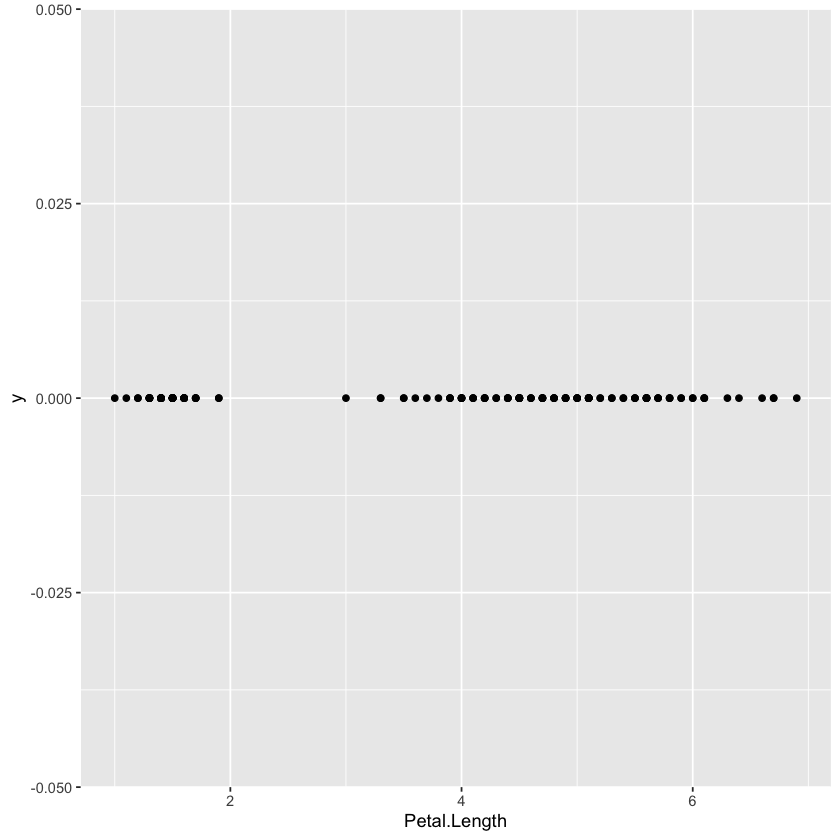

In [69]:
ggplot(iris, aes(x = Petal.Length, y = 0)) + geom_point()

### Histograms

A [histograms](https://en.wikipedia.org/wiki/Histogram) shows more about
the distribution by counting how many values fall within a bin and
visualizing the counts as a bar chart. We use `geom_rug` to place marks
for the original data points at the bottom of the histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


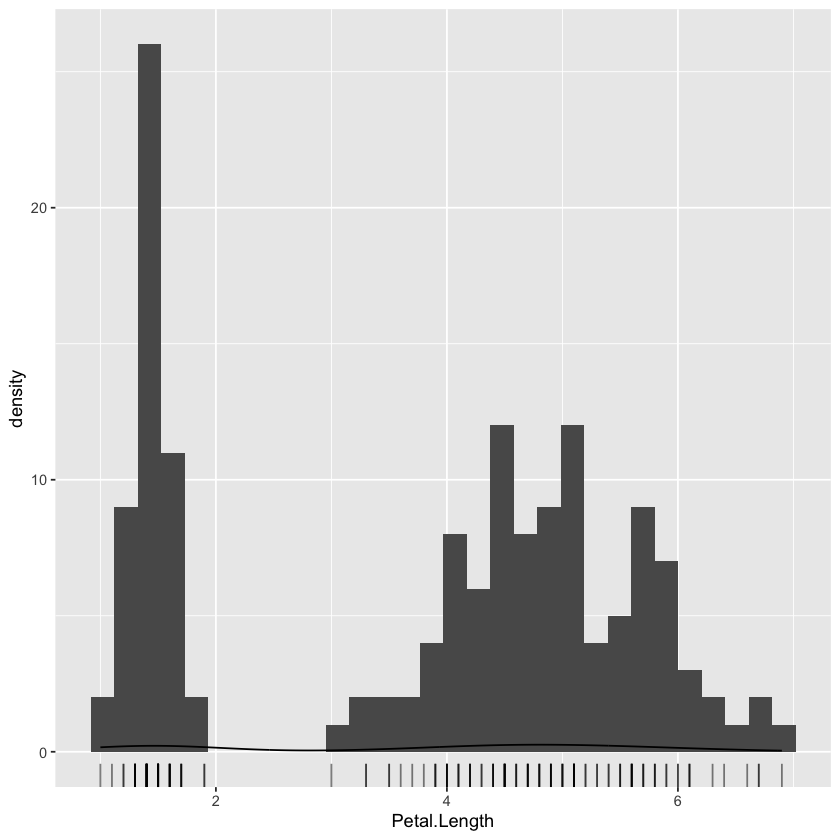

In [71]:
ggplot(iris, aes(x = Petal.Length)) +
  geom_histogram() +
  geom_rug(alpha = 1/2) +
  geom_density()

Two-dimensional distributions can be visualized using 2-d binning or
hexagonal bins.

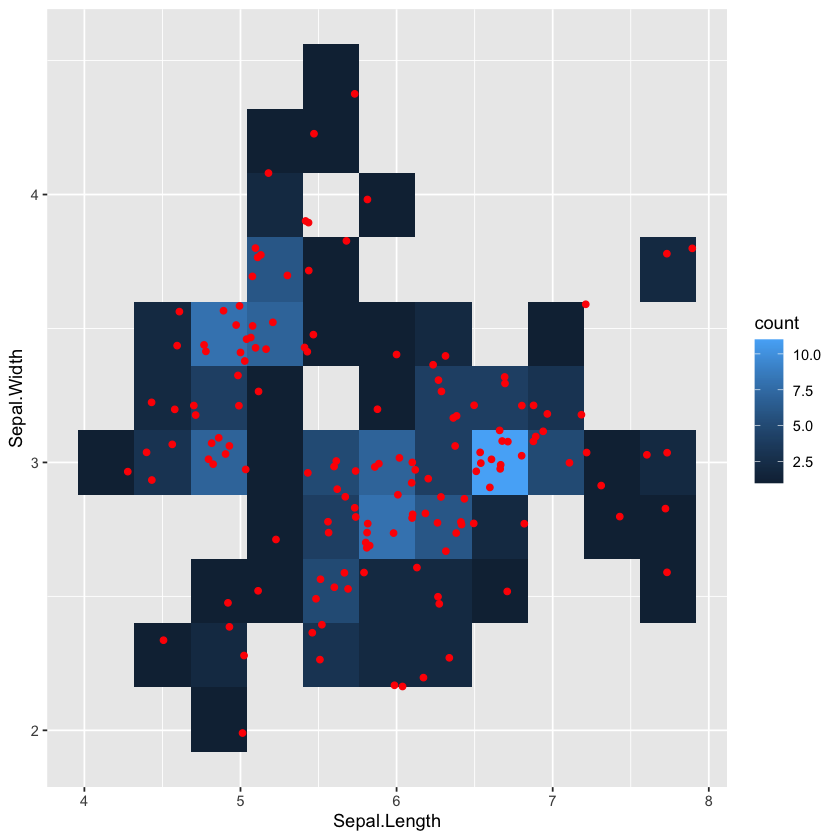

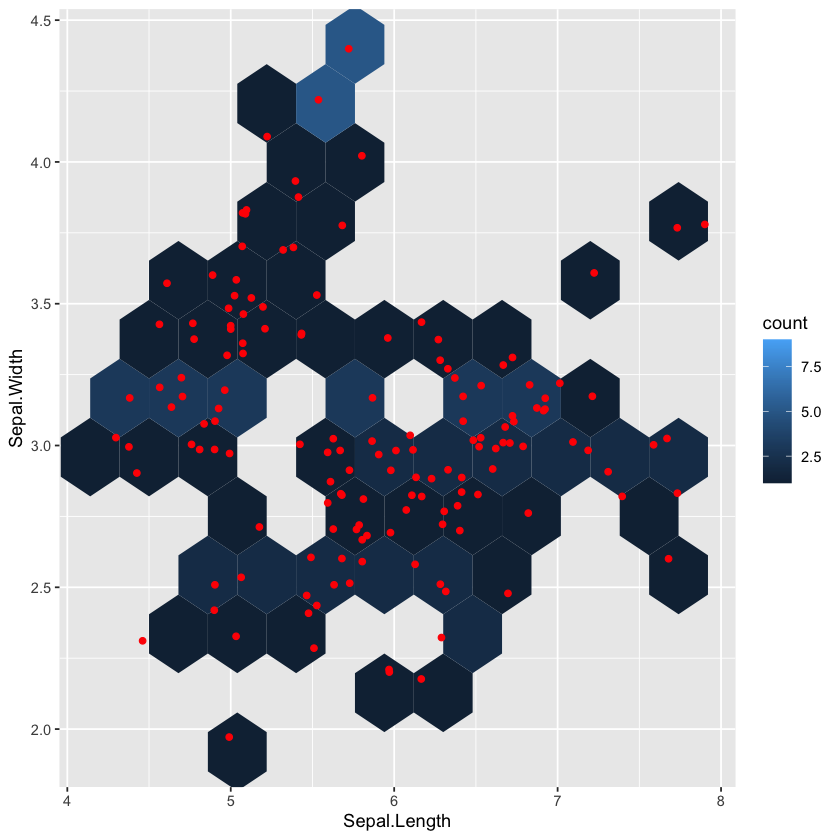

In [72]:
ggplot(iris, aes(Sepal.Length, Sepal.Width)) +
  geom_bin2d(bins = 10) +
  geom_jitter(color = "red")

ggplot(iris, aes(Sepal.Length, Sepal.Width)) +
  geom_hex(bins = 10) +
  geom_jitter(color = "red")

### Kernel Density Estimate (KDE)

[Kernel density
estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) is
used to estimate the probability density function (distribution) of a
feature. It works by replacing each value with a kernel function (often
a Gaussian) and then adding them up. The result is an estimated
probability density function that looks like a smoothed version of the
histogram. The bandwidth (`bw`) of the kernel controls the amount of
smoothing.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


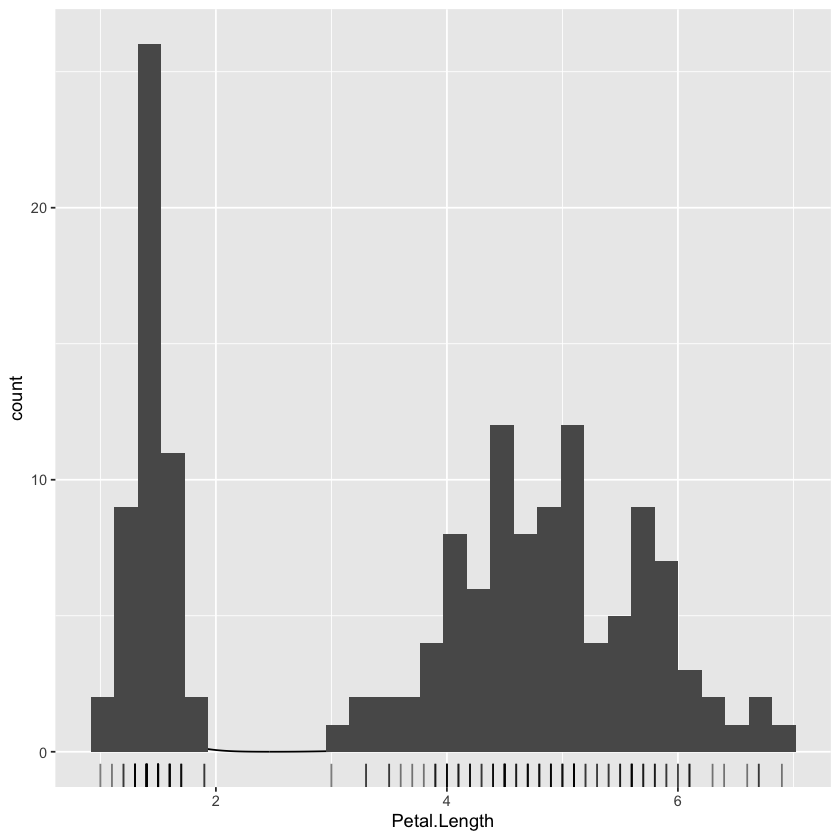

In [76]:
ggplot(iris, aes(Petal.Length)) +
  geom_density(bw = .2) +
  geom_rug(alpha = 1/2) +
  geom_histogram()

Kernel density estimates can also be done in two dimensions.

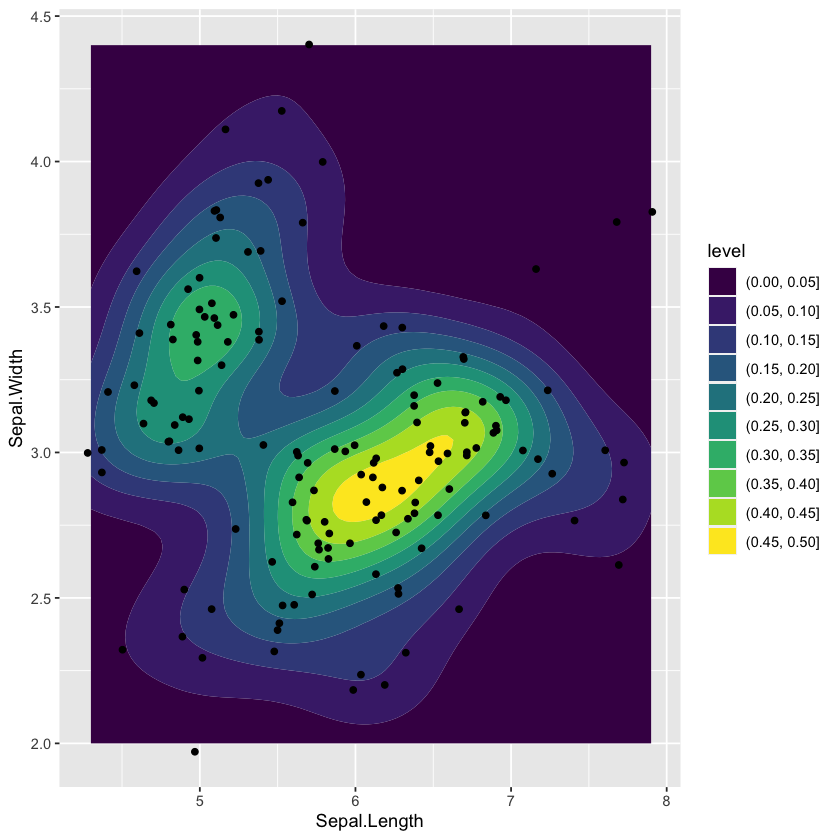

In [74]:
ggplot(iris, aes(Sepal.Length, Sepal.Width)) +
  geom_density_2d_filled() +
  geom_jitter()

## Exploring Data

### Basic statistics

Get summary statistics (using base R)

In [77]:
summary(iris)

  Sepal.Length   Sepal.Width    Petal.Length   Petal.Width        Species  
 Min.   :4.30   Min.   :2.00   Min.   :1.00   Min.   :0.1   setosa    :50  
 1st Qu.:5.10   1st Qu.:2.80   1st Qu.:1.60   1st Qu.:0.3   versicolor:50  
 Median :5.80   Median :3.00   Median :4.35   Median :1.3   virginica :50  
 Mean   :5.84   Mean   :3.06   Mean   :3.76   Mean   :1.2                  
 3rd Qu.:6.40   3rd Qu.:3.30   3rd Qu.:5.10   3rd Qu.:1.8                  
 Max.   :7.90   Max.   :4.40   Max.   :6.90   Max.   :2.5                  

Get mean and standard deviation for sepal length

In [78]:
iris %>% pull(Sepal.Length) %>% mean()
iris %>% pull(Sepal.Length) %>% sd()

[1] 5.84

[1] 0.828

Data with missing values will result in statistics of `NA`. Adding the
parameter `na.rm = TRUE` can be used in most statistics functions to
ignore missing values.

In [79]:
mean(c(1, 2, NA, 3, 4, 5))
mean(c(1, 2, NA, 3, 4, 5),  na.rm = TRUE)

[1] NA

[1] 3

Outliers are typically the smallest or the largest values of a feature.
To make the mean more robust to outliers, we can trim 10% of
observations from each end of the distribution.

In [80]:
iris %>% pull(Sepal.Length) %>% mean()
iris %>% pull(Sepal.Length) %>% mean(trim = .1)

[1] 5.84

[1] 5.81

Sepal length does not have outliers, so the trimmed mean is almost
identical.

To calculate a summary for a set of features (e.g., all numeric
features), tidyverse provides `summarize_if()`.

In [81]:
iris %>% summarize_if(is.numeric, mean)
iris %>% summarize_if(is.numeric, sd)

iris %>% summarize_if(is.numeric, list(min = min, median = median, max = max))

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 5.84         3.06        3.76         1.2

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 0.828        0.436       1.77         0.762

Sepal.Length_min Sepal.Width_min Petal.Length_min Petal.Width_min
1 4.3              2               1                0.1            
  Sepal.Length_median Sepal.Width_median Petal.Length_median Petal.Width_median
1 5.8                 3                  4.35                1.3               
  Sepal.Length_max Sepal.Width_max Petal.Length_max Petal.Width_max
1 7.9              4.4             6.9              2.5

The median absolute deviation (MAD) is another measure of dispersion.

In [82]:
iris %>% summarize_if(is.numeric, mad)

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 1.04         0.445       1.85         1.04

### Grouping

We can use the nominal feature to form groups and then calculate
group-wise statistics for the continuous features. We often use
group-wise averages to see if they differ between groups.

In [83]:
iris %>% group_by(Species) %>% summarize(across(Sepal.Length, mean))
iris %>% group_by(Species) %>% summarize_all(mean)

Species    Sepal.Length
1 setosa     5.01        
2 versicolor 5.94        
3 virginica  6.59

Species    Sepal.Length Sepal.Width Petal.Length Petal.Width
1 setosa     5.01         3.43        1.46         0.246      
2 versicolor 5.94         2.77        4.26         1.326      
3 virginica  6.59         2.97        5.55         2.026

We see that the species Virginica has the highest average for all, but
Sepal.Width.

The statistical difference between the groups can be tested using [ANOVA
(analysis of
variance)](http://www.sthda.com/english/wiki/one-way-anova-test-in-r).

In [84]:
res.aov <- aov(Sepal.Length ~ Species, data = iris)
summary(res.aov)
TukeyHSD(res.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2   63.2   31.61     119 <2e-16 ***
Residuals   147   39.0    0.27                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Length ~ Species, data = iris)

$Species
                      diff   lwr   upr p adj
versicolor-setosa    0.930 0.686 1.174     0
virginica-setosa     1.582 1.338 1.826     0
virginica-versicolor 0.652 0.408 0.896     0


The summary shows that there is a significant difference for
Sepal.Length between the groups. `TukeyHDS` evaluates differences
between pairs of groups. In this case, all are significantly different.
If the data only contains two groups, the `t.test` can be used.

### Tabulate data

We can count the number of flowers for each species.

In [85]:
iris %>% group_by(Species) %>% summarize(n())

Species    n()
1 setosa     50 
2 versicolor 50 
3 virginica  50

In [88]:
R.version

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          4                           
minor          2.2                         
year           2022                        
month          10                          
day            31                          
svn rev        83211                       
language       R                           
version.string R version 4.2.2 (2022-10-31)
nickname       Innocent and Trusting       

In [89]:
iris |> count(Species)

Species    n 
1 setosa     50
2 versicolor 50
3 virginica  50

In base R, this can be also done using `count(iris$Species)`.

For the following examples, we discretize the data using cut.

In [90]:
iris_ord <- iris |> mutate_if(is.numeric,
  function(x) cut(x, 3, labels = c("short", "medium", "long"), ordered = TRUE))

iris_ord
summary(iris_ord)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species  
1   short        medium      short        short       setosa   
2   short        medium      short        short       setosa   
3   short        medium      short        short       setosa   
4   short        medium      short        short       setosa   
5   short        medium      short        short       setosa   
6   short        long        short        short       setosa   
7   short        medium      short        short       setosa   
8   short        medium      short        short       setosa   
9   short        medium      short        short       setosa   
10  short        medium      short        short       setosa   
11  short        long        short        short       setosa   
12  short        medium      short        short       setosa   
13  short        medium      short        short       setosa   
14  short        medium      short        short       setosa   
15  medium       long        short        short       setosa   
16  medium       long        short        short       setosa   
17  short        long        short        short       setosa   
18  short        medium      short        short       setosa   
19  medium       long        short        short       setosa   
20  short        long        short        short       setosa   
21  short        medium      short        short       setosa   
22  short        long        short        short       setosa   
23  short        medium      short        short       setosa   
24  short        medium      short        short       setosa   
25  short        medium      short        short       setosa   
26  short        medium      short        short       setosa   
27  short        medium      short        short       setosa   
28  short        medium      short        short       setosa   
29  short        medium      short        short       setosa   
30  short        medium      short        short       setosa   
⋮   ⋮            ⋮           ⋮            ⋮           ⋮        
121 long         medium      long         long        virginica
122 medium       short       medium       long        virginica
123 long         short       long         long        virginica
124 medium       short       medium       long        virginica
125 medium       medium      long         long        virginica
126 long         medium      long         long        virginica
127 medium       short       medium       long        virginica
128 medium       medium      medium       long        virginica
129 medium       short       long         long        virginica
130 long         medium      long         medium      virginica
131 long         short       long         long        virginica
132 long         long        long         long        virginica
133 medium       short       long         long        virginica
134 medium       short       long         medium      virginica
135 medium       short       long         medium      virginica
136 long         medium      long         long        virginica
137 medium       medium      long         long        virginica
138 medium       medium      long         long        virginica
139 medium       medium      medium       long        virginica
140 long         medium      long         long        virginica
141 medium       medium      long         long        virginica
142 long         medium      long         long        virginica
143 medium       short       long         long        virginica
144 long         medium      long         long        virginica
145 medium       medium      long         long        virginica
146 medium       medium      long         long        virginica
147 medium       short       long         long        virginica
148 medium       medium      long         long        virginica
149 medium       medium      long         long        virginica
150 medium       medium      long         long        virginica

 Sepal.Length Sepal.Width Petal.Length Petal.Width       Species  
 short :59    short :47   short :50    short :50   setosa    :50  
 medium:71    medium:88   medium:54    medium:54   versicolor:50  
 long  :20    long  :15   long  :46    long  :46   virginica :50  

Cross tabulation is used to find out if two discrete features are
related.

In [91]:
tbl <- iris_ord |> select(Sepal.Length, Species) %>% table()
tbl

            Species
Sepal.Length setosa versicolor virginica
      short      47         11         1
      medium      3         36        32
      long        0          3        17

The table contains the number of rows that contain the combination of
values (e.g., the number of flowers with a short Sepal.Length and
species Setosa is `r tbl[1, 1]`). If a few cells have very large counts
and most others have very low counts, then there might be a
relationship. For the iris data, we see that species Setosa has mostly a
short Sepal.Length, while Versicolor and Virginica have longer sepals.

Creating a cross table with tidyverse is a little more involved and uses
pivot operations and grouping.

In [92]:
iris_ord |>
  select(Species, Sepal.Length) |>
### Relationship Between Nominal and Ordinal Features
  pivot_longer(cols = Sepal.Length) |>
  group_by(Species, value) |> count() |> ungroup() |>
  pivot_wider(names_from = Species, values_from = n)

value  setosa versicolor virginica
1 short  47     11          1       
2 medium  3     36         32       
3 long   NA      3         17

We can use a statistical test to determine if there is a significant
relationship between the two features. [Pearson's chi-squared
test](https://en.wikipedia.org/wiki/Chi-squared_test) for independence
is performed with the null hypothesis that the joint distribution of the
cell counts in a 2-dimensional contingency table is the product of the
row and column marginals. The null hypothesis h0 is independence between
rows and columns.

In [93]:
tbl %>% chisq.test()


	Pearson's Chi-squared test

data:  .
X-squared = 112, df = 4, p-value <2e-16


The small p-value indicates that the null hypothesis of independence
needs to be rejected. For small counts (cells with counts \<5),
[Fisher's exact
test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) is better.

In [94]:
fisher.test(tbl)


	Fisher's Exact Test for Count Data

data:  tbl
p-value <2e-16
alternative hypothesis: two.sided


### Percentiles (Quantiles)

[Quantiles](https://en.wikipedia.org/wiki/Quantile) are cutting points
dividing the range of a probability distribution into continuous
intervals with equal probability. For example, the median is the
empirical 50% quantile dividing the observations into 50% of the
observations being smaller than the median and the other 50% being
larger than the median.

By default quartiles are calculated. 25% is typically called Q1, 50% is
called Q2 or the median and 75% is called Q3.

In [95]:
iris %>% pull(Petal.Length) %>% quantile()

0%  25%  50%  75% 100% 
1.00 1.60 4.35 5.10 6.90

The interquartile range is a measure for variability that is robust
against outliers. It is defined the length Q3 - Q2 which covers the 50%
of the data in the middle.

In [96]:
iris %>% summarize(IQR = quantile(Petal.Length, probs = 0.75) - quantile(Petal.Length, probs = 0.25))

IQR
1 3.5

## Visualization

### Histogram

Histograms show the distribution of a single continuous feature.

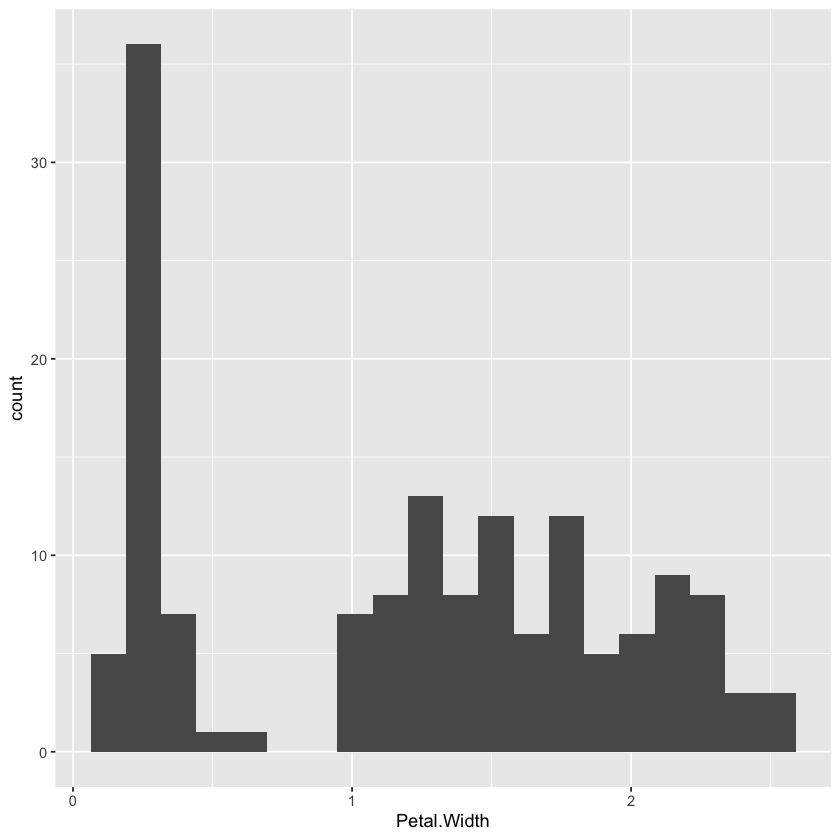

In [97]:
ggplot(iris, aes(Petal.Width)) + geom_histogram(bins = 20)

### Boxplot

Boxplots are used to compare the distribution of a feature between
different groups. The horizontal line in the middle of the boxes are the
group-wise medians, the boxes span the interquartile range. The whiskers
(vertical lines) span typically 1.4 times the interquartile range.
Points that fall outside that range are typically outliers shown as
dots.

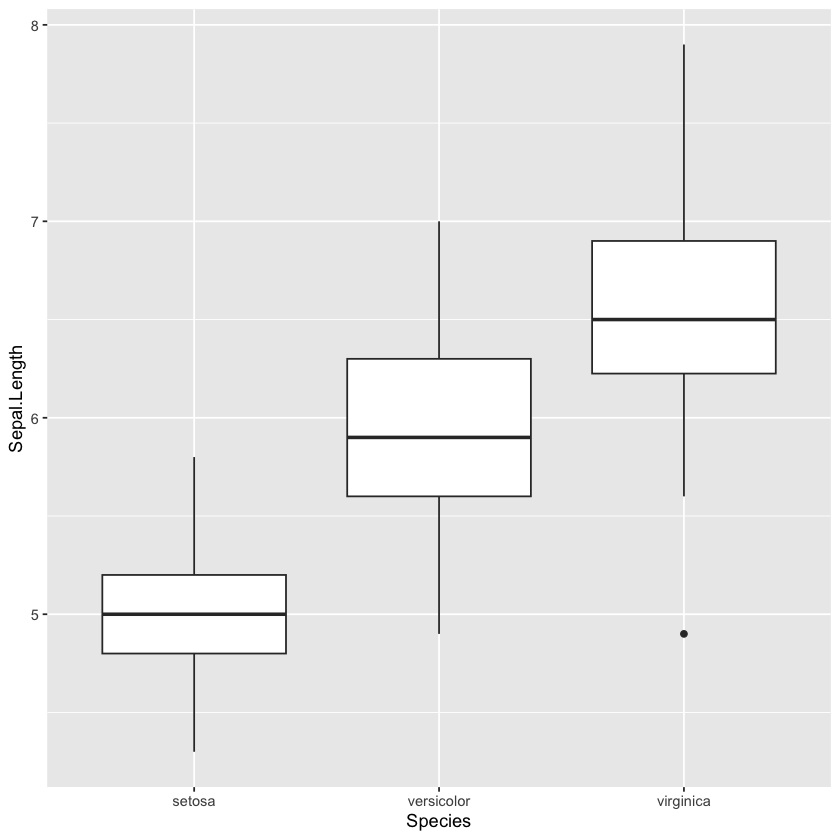

In [98]:
ggplot(iris, aes(Species, Sepal.Length)) + 
  geom_boxplot()

The group-wise medians can also be calculated directly.

In [99]:
iris %>% group_by(Species) %>% summarize_if(is.numeric, median)

Species    Sepal.Length Sepal.Width Petal.Length Petal.Width
1 setosa     5.0          3.4         1.50         0.2        
2 versicolor 5.9          2.8         4.35         1.3        
3 virginica  6.5          3.0         5.55         2.0

To compare the distribution of the four features using a ggplot boxplot,
we first have to transform the data into long format (i.e., all feature
values are combined into a single column).

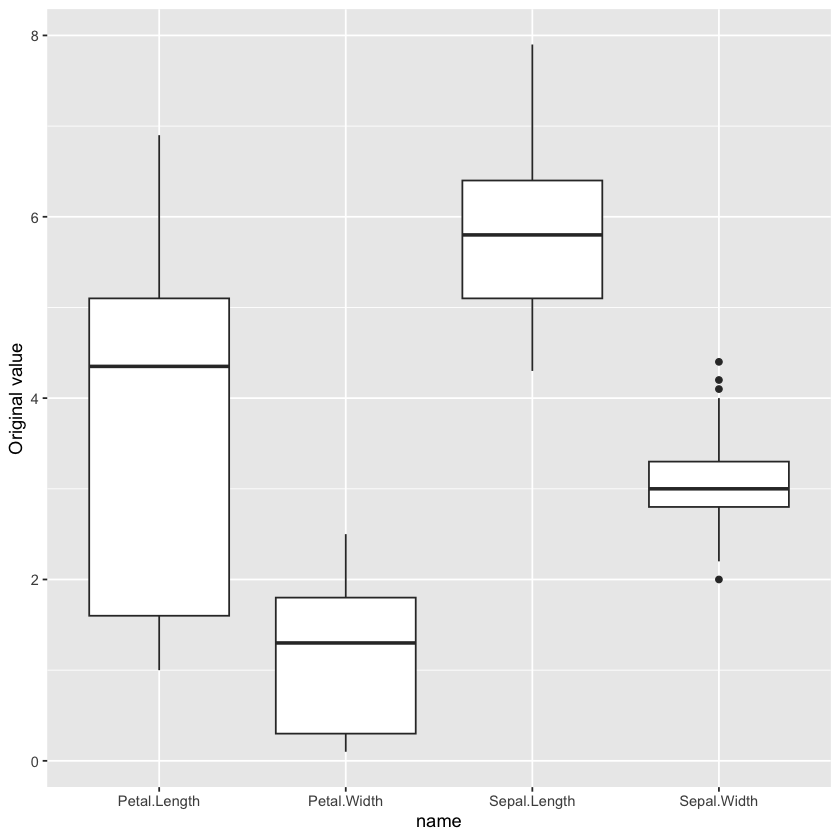

In [100]:
library(tidyr)
iris_long <- iris %>% mutate(id = row_number()) %>% pivot_longer(1:4)
ggplot(iris_long, aes(name, value)) + 
  geom_boxplot() +
  labs(y = "Original value")

This visualization is only useful if all features have roughly the same
range. The data can be scaled first to compare the distributions.

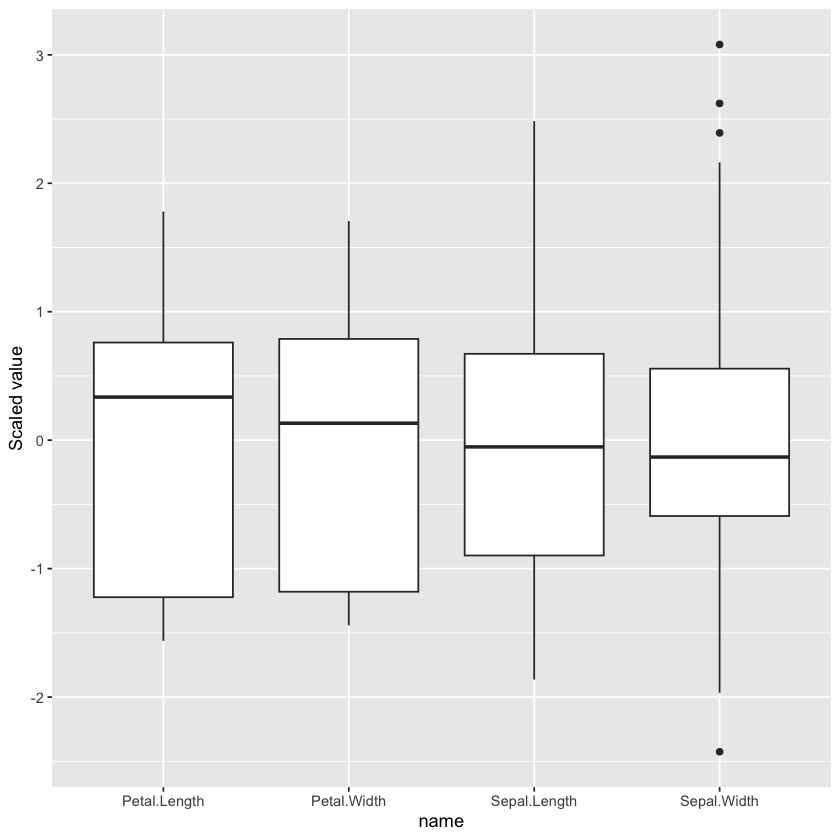

In [101]:
library(tidyr)
iris_long_scaled <- iris %>% scale_numeric() %>% mutate(id = row_number()) %>% pivot_longer(1:4)
ggplot(iris_long_scaled, aes(name, value)) + 
  geom_boxplot() +
  labs(y = "Scaled value")

### Scatter plot

Scatter plots show the relationship between two continuous features.

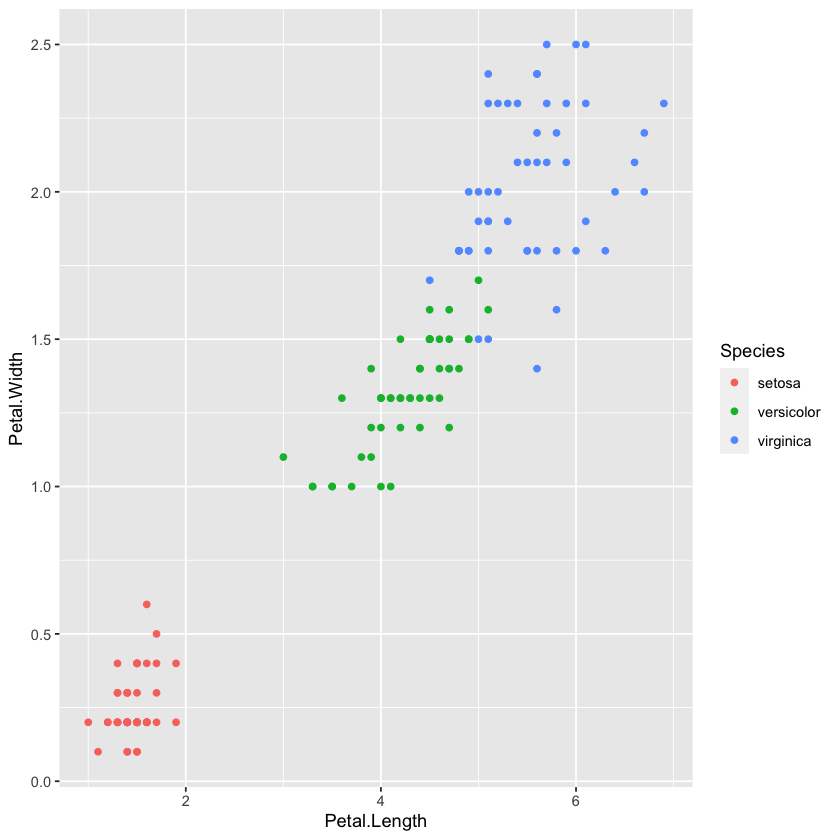

In [102]:
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) + 
  geom_point()

### Scatter Plot Matrix

A scatter plot matrix show the relationship between several features

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


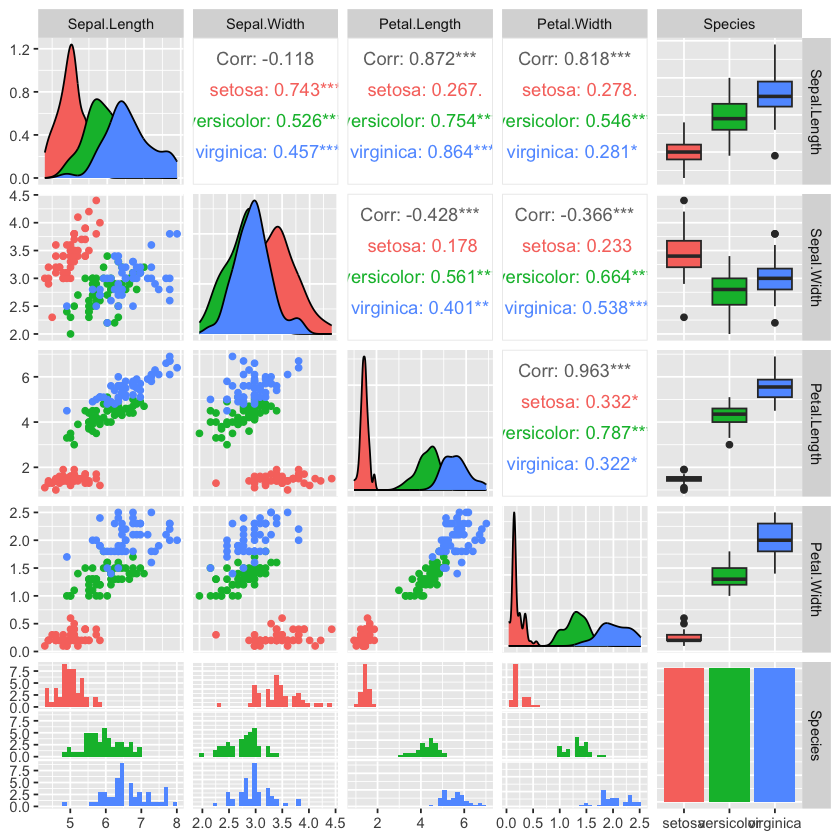

In [103]:
library("GGally")
ggpairs(iris,  aes(color = Species))

The implementation in package `GGally` also shows additional plots
(histograms, density estimates and box plots) and correlation
coefficients.

### Data Matrix Visualization

Matrix visualization shows the values in the matrix using a color scale.

In [104]:
iris_matrix <- iris %>% select(-Species) %>% as.matrix()

We need the long format for tidyverse.

id name         value
1 1  Sepal.Length 5.1  
2 1  Sepal.Width  3.5  
3 1  Petal.Length 1.4  
4 1  Petal.Width  0.2  
5 2  Sepal.Length 4.9  
6 2  Sepal.Width  3.0

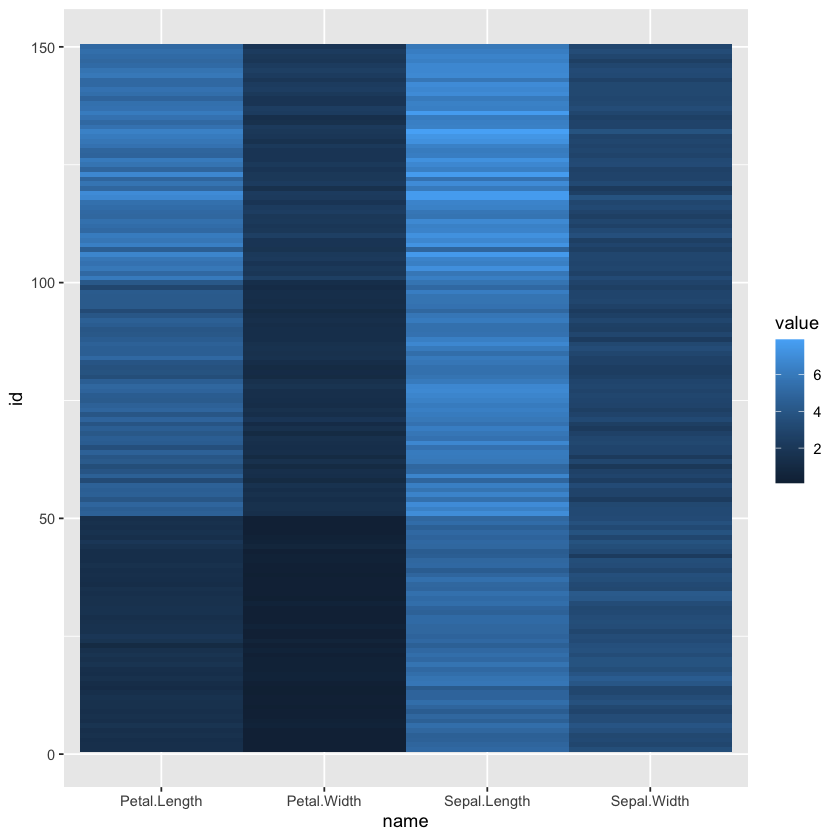

In [105]:
iris_long <- as_tibble(iris_matrix) %>% mutate(id = row_number()) %>% pivot_longer(1:4)
head(iris_long)

ggplot(iris_long,
  aes(x = name, y = id, fill = value)) + geom_tile()

Smaller values are darker. Package `seriation` provides a simpler
plotting function.

Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy


Attaching package: ‘seriation’


The following object is masked from ‘package:lattice’:

    panel.lines




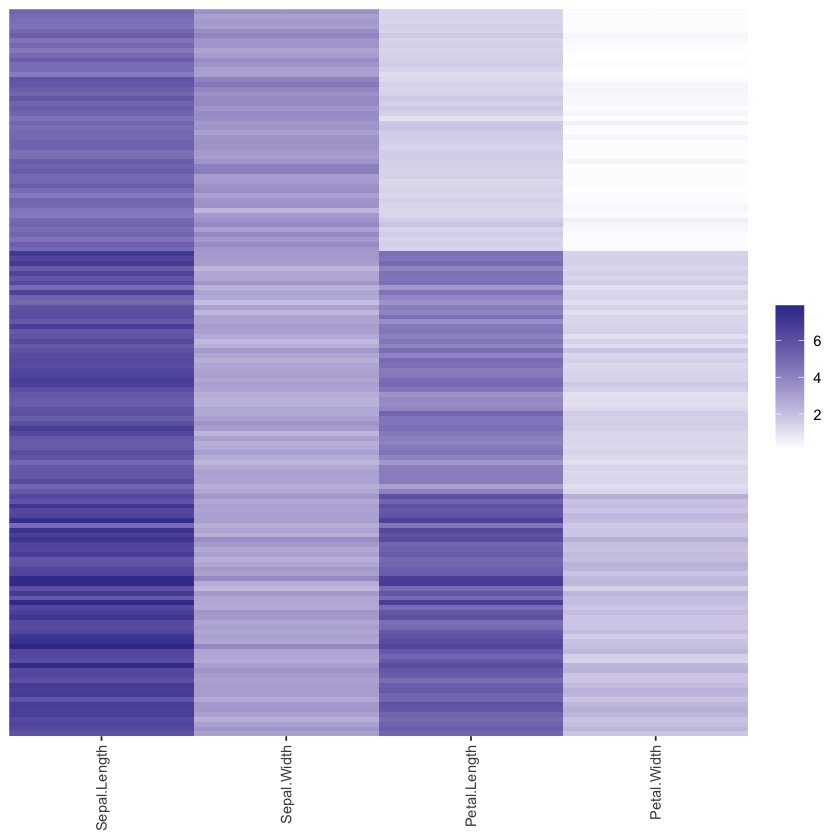

In [110]:
library(seriation)
ggpimage(iris_matrix, prop = FALSE)

We can scale the features to z-scores to make them better comparable.

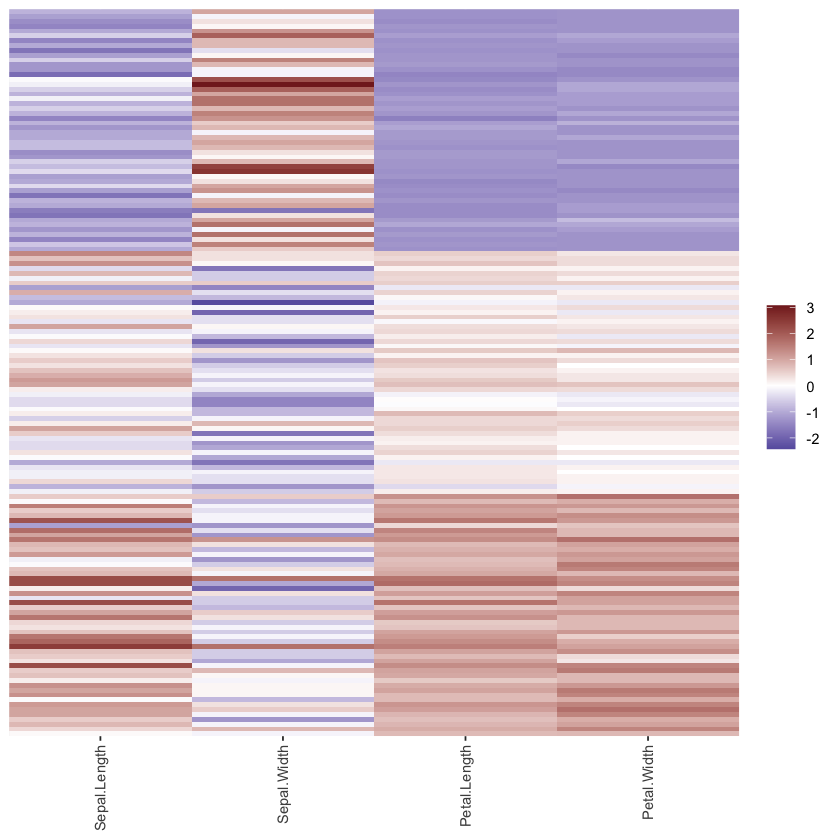

In [111]:
iris_scaled <- scale(iris_matrix)
ggpimage(iris_scaled, prop = FALSE)

This reveals red and blue blocks. Each row is a flower and the flowers
in the Iris dataset are sorted by species. The blue blocks for the top
50 flowers show that these flowers are smaller than average for all but
Sepal.Width and the red blocks show that the bottom 50 flowers are
larger for most features.

Often, reordering data matrices help with visualization. A reordering
technique is called seriation. Ir reorders rows and columns to place
more similar points closer together.

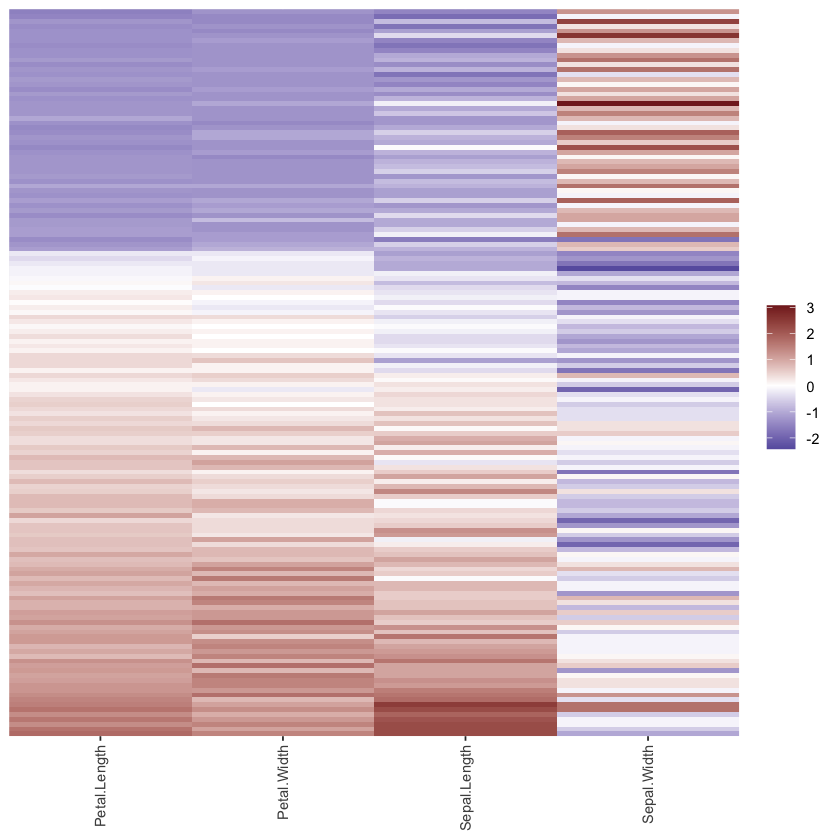

In [112]:
ggpimage(iris_scaled, order = seriate(iris_scaled), prop = FALSE)

We see that the rows (flowers) are organized from very blue to very red
and the features are reordered to move Sepal.Width all the way to the
right because it is very different from the other features.

### Correlation Matrix

A correlation matrix contains the correlation between features.

In [113]:
cm1 <- iris %>% select(-Species) %>% as.matrix %>% cor()
cm1

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.000       -0.118       0.872        0.818     
Sepal.Width  -0.118        1.000      -0.428       -0.366     
Petal.Length  0.872       -0.428       1.000        0.963     
Petal.Width   0.818       -0.366       0.963        1.000

Package `ggcorrplot` provides a visualization for correlation matrices.

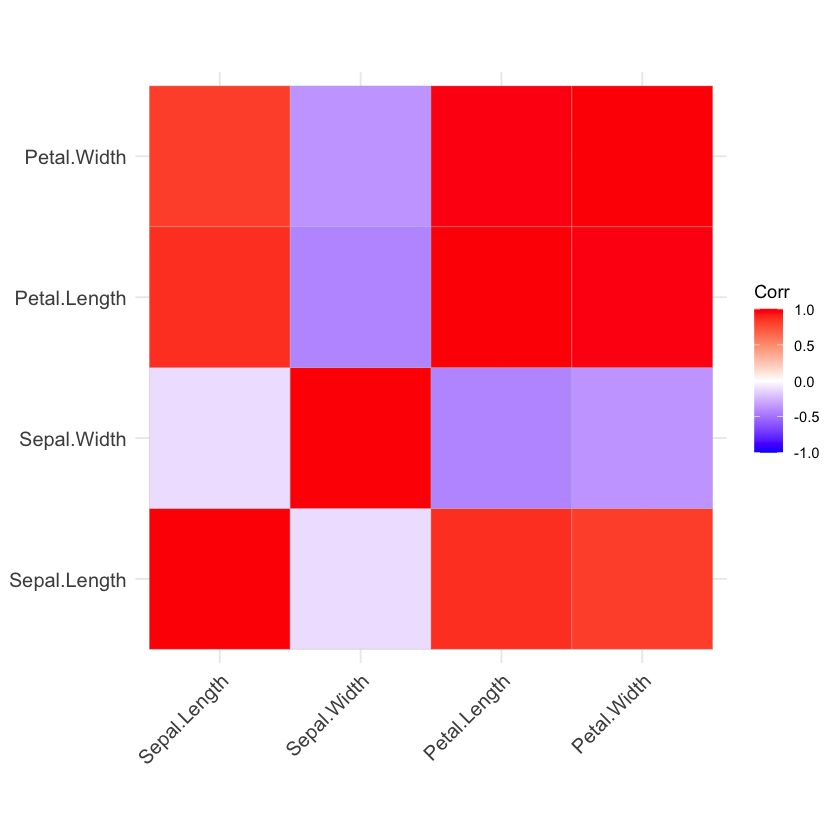

In [115]:
library(ggcorrplot)
ggcorrplot(cm1)

Package `seriation` provides a reordered version for this plot using a
heatmap.

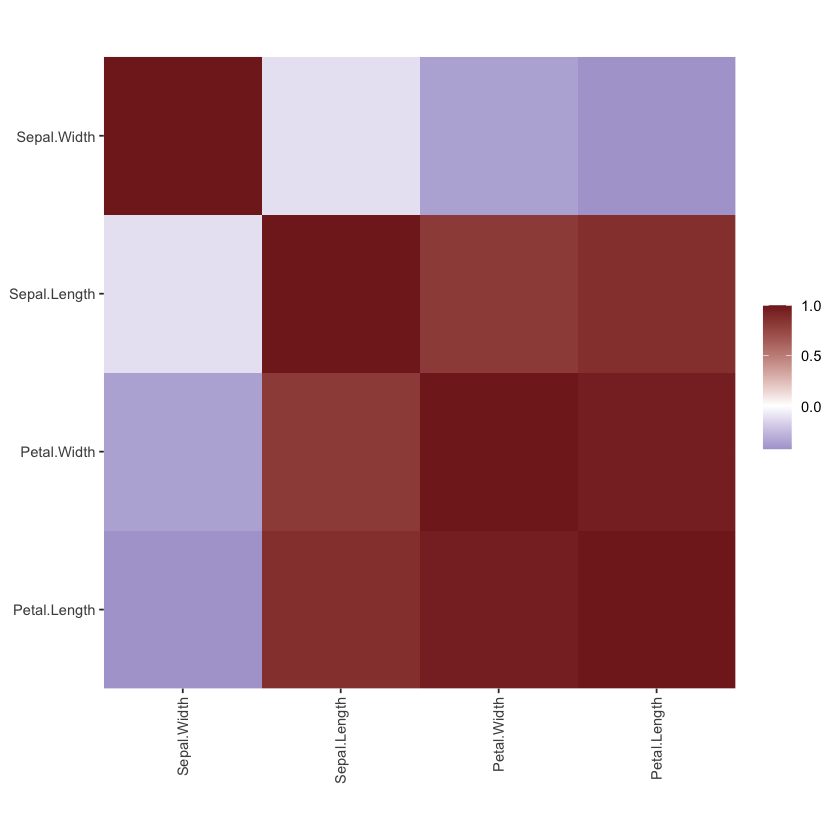

In [116]:
gghmap(cm1, prop = TRUE)

Correlations can also be calculates between objects by transposing the
data matrix.

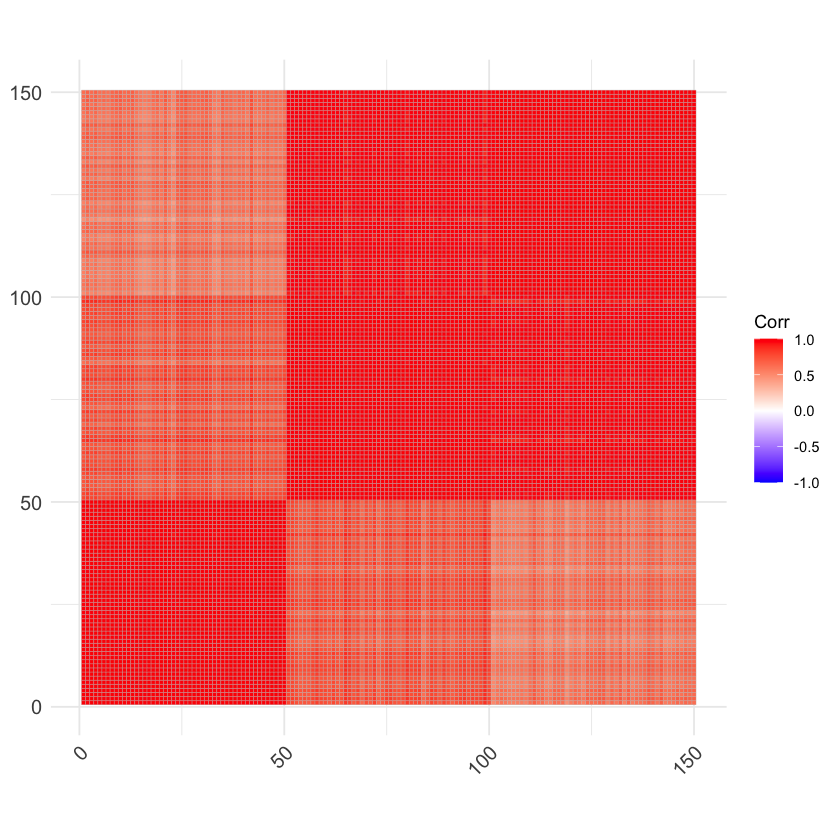

In [117]:
cm2 <- iris %>% select(-Species) %>% as.matrix() %>% t() %>% cor()

ggcorrplot(cm2)

Object-to-object correlations can be used as a measure of similarity.
The dark red blocks indicate different species.

### Parallel Coordinates Plot

Parallel coordinate plots can visualize several features in a single
plot. Lines connect the values for each object (flower).

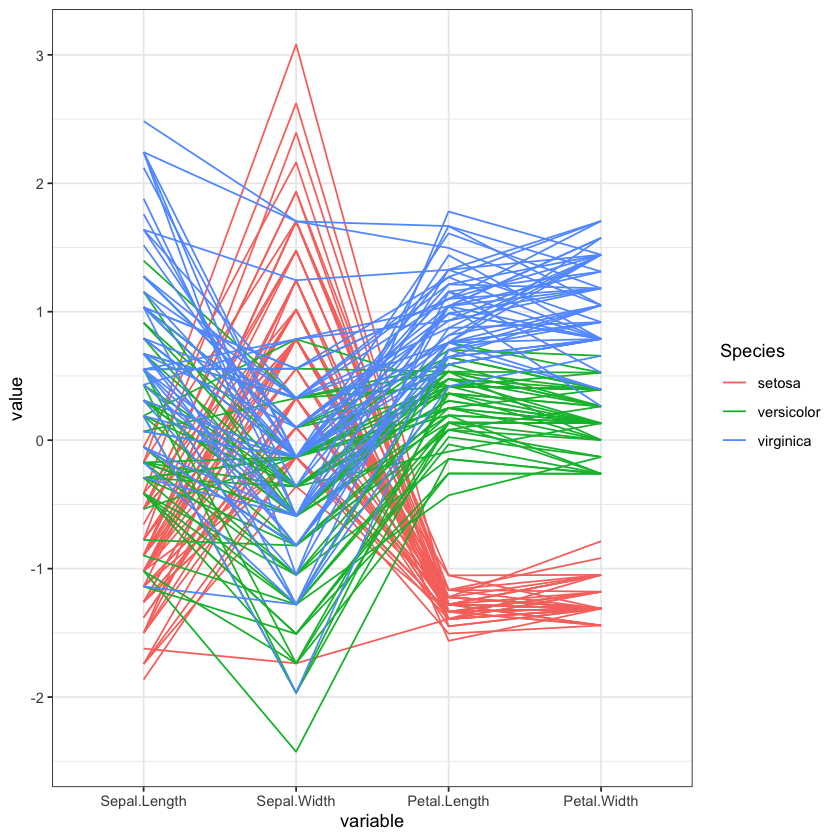

In [107]:
library(GGally)
ggparcoord(iris, columns = 1:4, groupColumn = 5) + theme_bw()

The plot can be improved by reordering the variables to place correlated
features next to each other.

In [108]:
o <- seriate(as.dist(1-cor(iris[,1:4])), method = "BBURCG")
get_order(o)
ggparcoord(iris, columns = get_order(o), groupColumn = 5)

ERROR: Error in seriate(as.dist(1 - cor(iris[, 1:4])), method = "BBURCG"): could not find function "seriate"


### More Visualizations

A well organized collection of visualizations with code can be found at
[The R Graph Gallery](https://www.r-graph-gallery.com/).